In [1]:
import numpy as np

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [3]:
res_data=pd.read_csv("resources.csv")
train_data=pd.read_csv("train_data.csv")

Number of projects thar are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects thar are not approved for funding  16542 , ( 15.141695957820739 %)


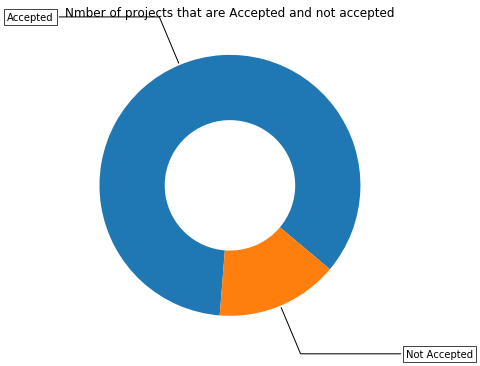

In [4]:
y_value_counts = train_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)
    
    ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()


### The above pie chart shows that there are more projects that are accepted than rejected.The data is not a balanced data

In [5]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(train_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']





In [6]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


In [7]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()


In [8]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    
    temp = pd.DataFrame(train_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()
   # print(temp)

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(train_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(train_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    #print (temp)
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

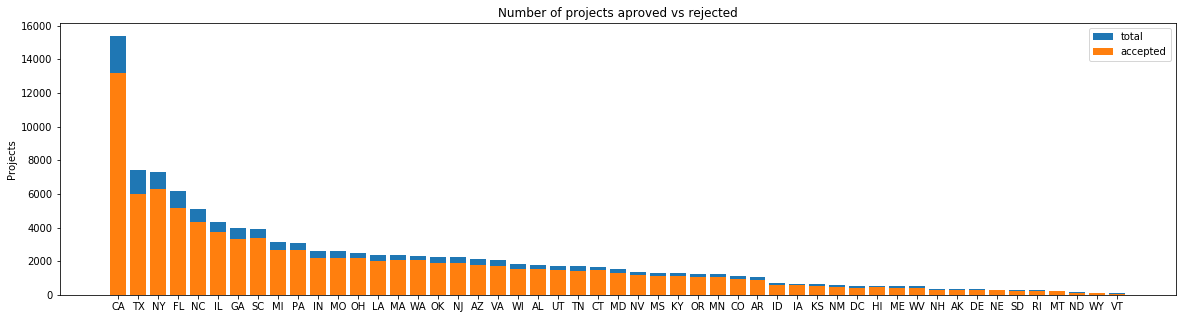

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [9]:
univariate_barplots(train_data, 'school_state', 'project_is_approved', False)

### The above graph depicts that for each state no: of projects approved is far greater than no : of projects rejected.
### More is the no : of projects belongig to a state,more is the no : of projects approved and more is the projects rejected

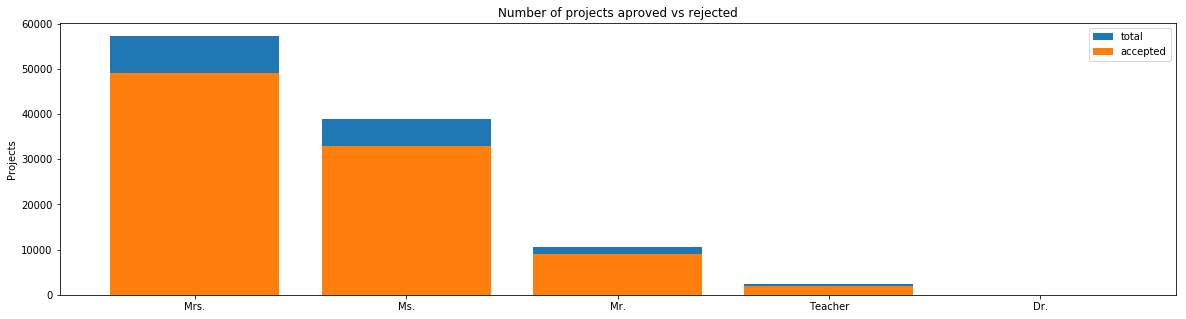

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [10]:
univariate_barplots(train_data, 'teacher_prefix', 'project_is_approved' , top=False)

### No: of projects belonging to prefix Mrs is higher  and Dr. is lower in terms of both number of projects approved and rejected
### More is the no : of projects belongig by a certain teacher_prefix,more is the no : of projects approved and more is the projects rejected

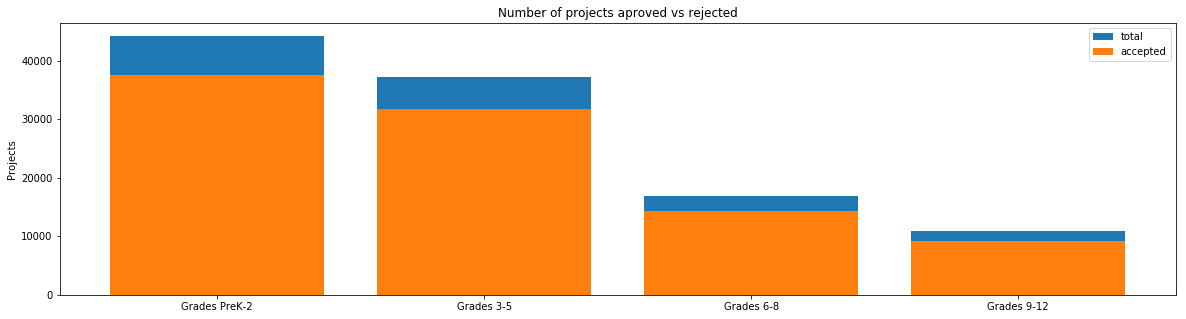

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [11]:
univariate_barplots(train_data, 'project_grade_category', 'project_is_approved', top=False)

### No: of projects belonging to project_grade_category  of PreK-2 is higher  and Grades 9-12 is lower in terms of both number of projects approved and rejected
### More is the no : of projects belonging to a particular grade,more is the no : of projects approved and more is the projects rejected

In [12]:
categories=list(train_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in categories:
    temp = ""
    for j in i.split(','):
        if 'The' in j.split(): 
            j=j.replace('The','')
        j = j.replace(' ','')
        
        temp+=j.strip()+" "
        temp = temp.replace('&','')
        
        #temp = temp.replace(' ','_')
        temp.rstrip()
        temp.rstrip()
    cat_list.append(temp.replace('_',''))

In [13]:
set(cat_list)

{'AppliedLearning ',
 'AppliedLearning HealthSports ',
 'AppliedLearning HistoryCivics ',
 'AppliedLearning LiteracyLanguage ',
 'AppliedLearning MathScience ',
 'AppliedLearning MusicArts ',
 'AppliedLearning SpecialNeeds ',
 'AppliedLearning Warmth CareHunger ',
 'HealthSports ',
 'HealthSports AppliedLearning ',
 'HealthSports HistoryCivics ',
 'HealthSports LiteracyLanguage ',
 'HealthSports MathScience ',
 'HealthSports MusicArts ',
 'HealthSports SpecialNeeds ',
 'HealthSports Warmth CareHunger ',
 'HistoryCivics ',
 'HistoryCivics AppliedLearning ',
 'HistoryCivics HealthSports ',
 'HistoryCivics LiteracyLanguage ',
 'HistoryCivics MathScience ',
 'HistoryCivics MusicArts ',
 'HistoryCivics SpecialNeeds ',
 'HistoryCivics Warmth CareHunger ',
 'LiteracyLanguage ',
 'LiteracyLanguage AppliedLearning ',
 'LiteracyLanguage HealthSports ',
 'LiteracyLanguage HistoryCivics ',
 'LiteracyLanguage MathScience ',
 'LiteracyLanguage MusicArts ',
 'LiteracyLanguage SpecialNeeds ',
 'Litera

In [14]:
train_data['clean_categories'] = cat_list
#train_data.drop(['project_subject_categories'], axis=1, inplace=True)


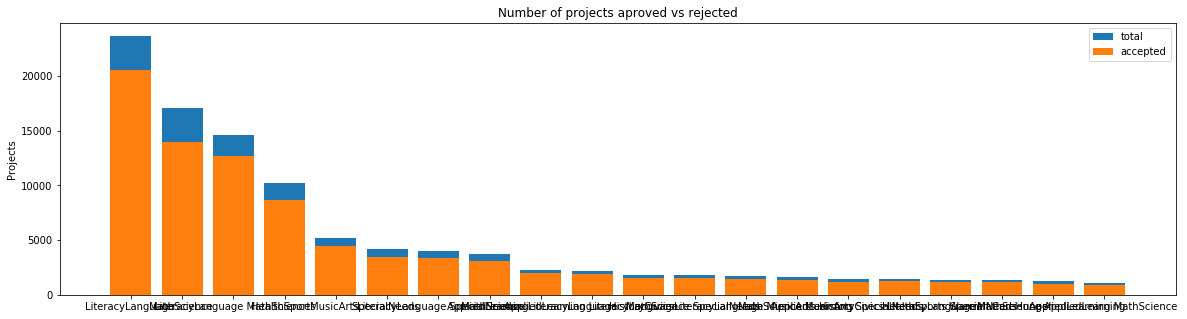

                 clean_categories  project_is_approved  total       Avg
24              LiteracyLanguage                 20520  23655  0.867470
32                   MathScience                 13991  17072  0.819529
28  LiteracyLanguage MathScience                 12725  14636  0.869432
8                   HealthSports                  8640  10177  0.848973
40                     MusicArts                  4429   5180  0.855019
                   clean_categories  project_is_approved  total       Avg
19  HistoryCivics LiteracyLanguage                  1271   1421  0.894441
14       HealthSports SpecialNeeds                  1215   1391  0.873472
50               Warmth CareHunger                  1212   1309  0.925898
33     MathScience AppliedLearning                  1019   1220  0.835246
4      AppliedLearning MathScience                   855   1052  0.812738


In [15]:
univariate_barplots(train_data, 'clean_categories', 'project_is_approved', top=20)

### The above graph shows subject_category wise no : of approved and rejected.More no : of projects areapproved for Literacy_languagecategory and least no : of projects are approved for AppliedLearning Math_Science.For each and every subject_category,numberof projects approved is far greater than no : of projects rejected  

In [16]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in train_data['clean_categories'].values:
    my_counter.update(word.split())
#print(my_counter)

{'LiteracyLanguage': 52239, 'HistoryCivics': 5914, 'HealthSports': 14223, 'MathScience': 41421, 'SpecialNeeds': 13642, 'AppliedLearning': 12135, 'MusicArts': 10293, 'Warmth': 1388, 'CareHunger': 1388}
{'Warmth': 1388, 'CareHunger': 1388, 'HistoryCivics': 5914, 'MusicArts': 10293, 'AppliedLearning': 12135, 'SpecialNeeds': 13642, 'HealthSports': 14223, 'MathScience': 41421, 'LiteracyLanguage': 52239}


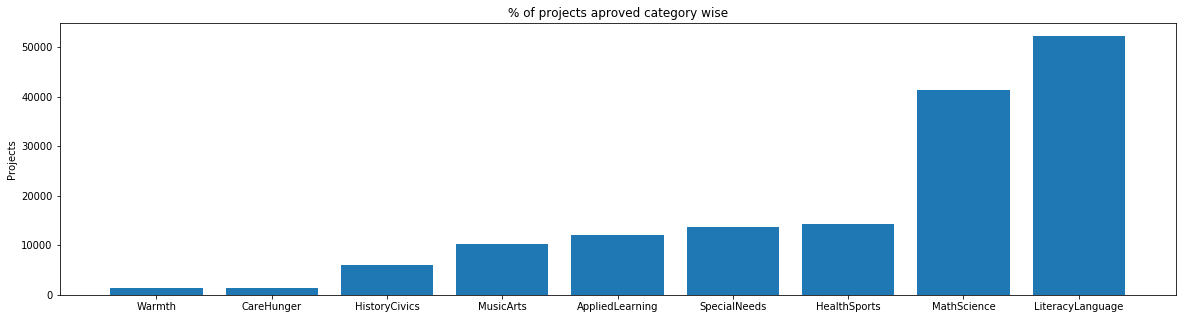

In [17]:
cat_dict=dict(my_counter)
print(cat_dict)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
print(sorted_cat_dict)


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

### graph compares the no : of projects accepted category wise.It is observed that projects belonging to litecracy_language are acccepted more

In [18]:
for i,j in sorted_cat_dict.items():
    print("{:25} :{:10}".format(i,j))

Warmth                    :      1388
CareHunger                :      1388
HistoryCivics             :      5914
MusicArts                 :     10293
AppliedLearning           :     12135
SpecialNeeds              :     13642
HealthSports              :     14223
MathScience               :     41421
LiteracyLanguage          :     52239


In [19]:
categories=list(train_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
sub_cat_list = []
for i in categories:
    temp = ""
    for j in i.split(','):
        if 'The' in j.split(): 
            j=j.replace('The','')
        if '&' in j.split(): 
            j=j.replace('&','')    
       # j = j.replace(' ','')
        j=j.replace('&',' ')
        temp+=j.strip()+" "
        temp = temp.replace('&',' ')
        temp=temp.strip()
    sub_cat_list.append(temp.strip())

In [20]:
train_data['clean_subcategories'] = sub_cat_list
#train_data.drop(['project_subject_subcategories'], axis=1, inplace=True)


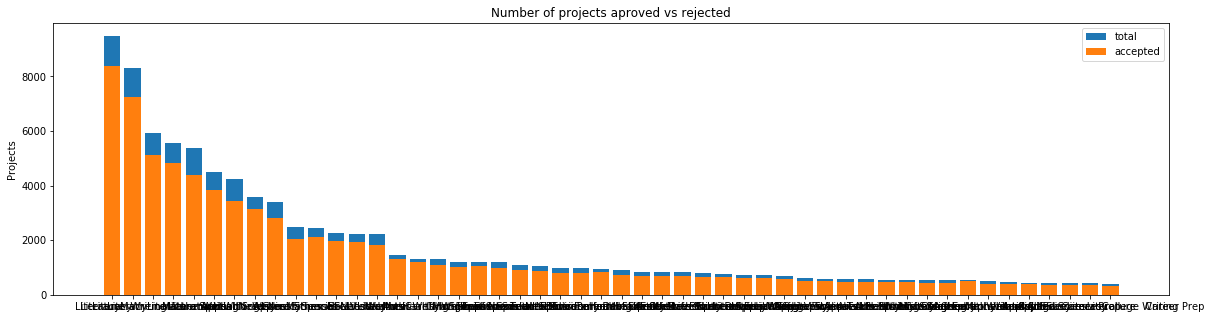

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319             LiteracyMathematics                 7260   8325  0.872072
331  Literature  WritingMathematics                 5140   5923  0.867803
318     LiteracyLiterature  Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                      clean_subcategories  project_is_approved  total  \
196         Environmental ScienceLiteracy                  389    444   
127                                   ESL                  349    421   
79                   College  Career Prep                  343    421   
17    Applied SciencesLiterature  Writing                  361    420   
3    Applied SciencesCollege  Career Prep                  330    405   

          Avg  
196  0.876126  
127  0.828979  
79   0.814727  
17   0.859524  
3    0.814815  


In [21]:
univariate_barplots(train_data, 'clean_subcategories', 'project_is_approved', top=50)

### The above graph shows subject_category wise no : of approved and rejected.More no : of projects areapproved for Literacy subcategory and least no : of projects are approved for Appliedsciences College_CareerPrep .For each and every subject_category,numberof projects approved is far greater than no : of projects rejected  

In [22]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in train_data['clean_subcategories'].values:
    my_counter.update(word.split())
    dict.update
print(my_counter)

Counter({'Writing': 13562, 'Needs': 13275, 'Literature': 13118, 'Applied': 10816, 'Literacy': 9802, 'Health': 9726, 'LiteracyMathematics': 8458, 'Arts': 8099, 'Wellness': 6600, 'WritingMathematics': 5923, 'LiteracyLiterature': 5586, 'Mathematics': 5379, 'Science': 4845, 'Special': 4593, 'Gym': 4432, 'Environmental': 4378, 'Sciences': 4284, 'Life': 4235, 'Early': 3814, 'SciencesMathematics': 3399, 'Career': 2568, 'LiteracySpecial': 2490, 'History': 2448, 'FitnessHealth': 2273, 'ESLLiteracy': 2234, 'Visual': 2219, 'Sports': 2186, 'College': 2035, 'Character': 2012, 'Education': 1669, 'Music': 1472, 'Hunger': 1388, 'ScienceMathematics': 1375, 'Development': 1345, 'WarmthCare': 1309, 'WritingSpecial': 1306, 'Fitness': 1272, 'Geography': 1263, 'WellnessSpecial': 1189, 'MathematicsSpecial': 1187, 'ScienceHealth': 1173, 'Team': 1067, 'SciencesEnvironmental': 984, 'Prep': 954, 'MusicPerforming': 948, 'Other': 831, 'WellnessNutrition': 797, 'Civics': 796, 'Foreign': 786, 'DevelopmentSpecial': 7

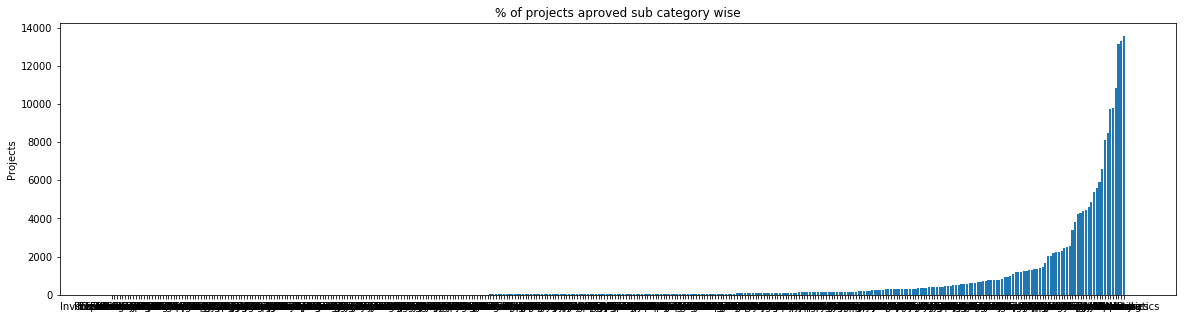

In [23]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved sub category wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

### Shows no : of projects approved sub category wise .It is more for literacy.

{13: 1, 12: 11, 11: 30, 1: 31, 10: 3968, 9: 5383, 8: 7289, 2: 8733, 7: 10631, 6: 14824, 3: 18691, 5: 19677, 4: 19979}


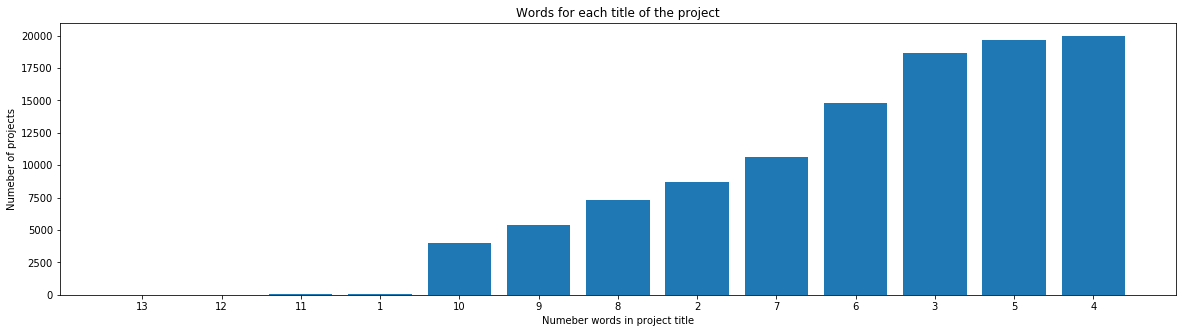

In [24]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = train_data['project_title'].str.split().apply(len).value_counts()
#print(word_count)
word_dict = dict(word_count)
#print(word_dict)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
print(word_dict)


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

### Of all the projects approved,more of them has words in the project title as 3,4 and 5 

In [25]:
approved_title_word_count = train_data[train_data['project_is_approved']==1]['project_title'].str.split().apply(len)

approved_title_word_count = approved_title_word_count.values
#print(approved_title_word_count)
rejected_title_word_count = train_data[train_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

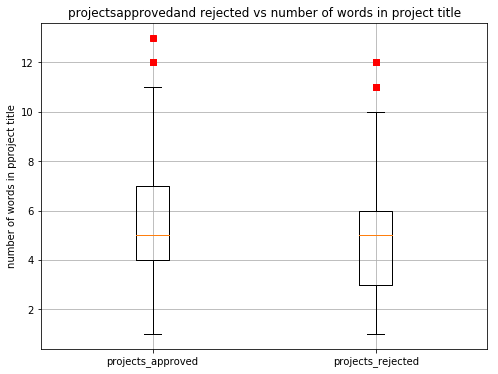

In [26]:
# sample code taken from https://stackoverflow.com/questions/24337726/draw-box-plot-with-matplotlib

import matplotlib.pyplot as plt

x1 = approved_title_word_count
x2 = rejected_title_word_count


fig = plt.figure(figsize=(8,6))

plt.boxplot([x for x in [x1, x2]], 0, 'rs', 1)
plt.xticks([y+1 for y in range(len([x1, x2]))], ['projects_approved', 'projects_rejected'])
plt.ylabel('number of words in pproject title')
t = plt.title('projectsapprovedand rejected vs number of words in project title')
plt.grid()
plt.show()

###  number of words in project title <= 4 are rejected and no : of words in project tile >=7 are accepted

In [27]:
import seaborn  as sns

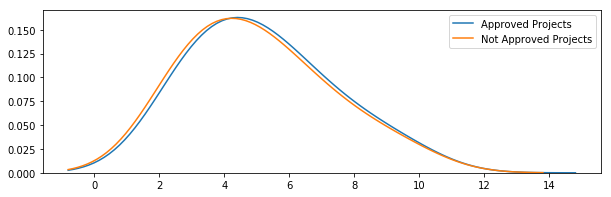

In [28]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()


### No conclusions can be drawn from the graph

### Univariate Analysis: Text features (Project Essay's)

In [29]:
# merge two column text dataframe: 
train_data["essay"] = train_data["project_essay_1"].map(str) +\
                        train_data["project_essay_2"].map(str) + \
                        train_data["project_essay_3"].map(str) + \
                        train_data["project_essay_4"].map(str)

In [30]:
approved_word_count = train_data[train_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values
print(approved_word_count)

rejected_word_count = train_data[train_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

[221 213 234 ... 181 254 263]


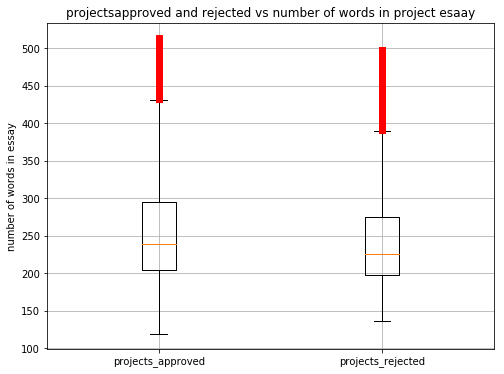

In [31]:
# sample code taken from https://stackoverflow.com/questions/24337726/draw-box-plot-with-matplotlib

import matplotlib.pyplot as plt

x1 = approved_word_count
x2 = rejected_word_count


fig = plt.figure(figsize=(8,6))

plt.boxplot([x for x in [x1, x2]], 0, 'rs', 1)
plt.xticks([y+1 for y in range(len([x1, x2]))], ['projects_approved', 'projects_rejected'])
plt.ylabel('number of words in essay')
t = plt.title('projectsapproved and rejected vs number of words in project esaay')
plt.grid()
plt.show()

### No : of words in project esaay > 380 and <140  are approved 


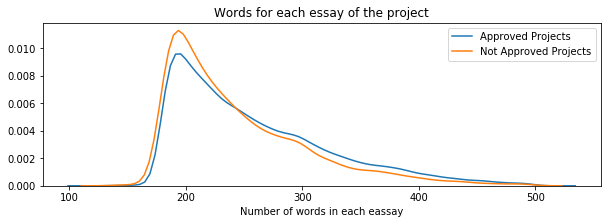

In [32]:
import seaborn as sns
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

##### Cannot be concluded from the graph

### Univariate Analysis: Cost per project

In [33]:
res_data.head(3)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45


In [34]:
# https://stackoverflow.com/questions/39441484/pandas-groupby-and-aggregate-without-losing-the-column-which-was-grouped
price_data=res_data.groupby('id').agg(lambda x: sum(x)).reset_index()
price_data.head(3)

,id,quantity,price
0,p000001,7,459.56
1,p000002,21,515.89
2,p000003,4,298.97


In [35]:
# join two dataframes in python: 
train_data = pd.merge(train_data, price_data, on='id', how='left')

In [36]:
train_data=train_data.sample(frac=0.6,random_state=25)

In [37]:
train_data.shape

(65549, 22)

In [38]:
approved_price = train_data[train_data['project_is_approved']==1]['price'].values

rejected_price = train_data[train_data['project_is_approved']==0]['price'].values

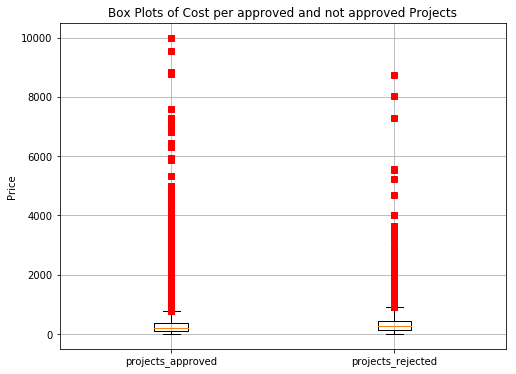

In [39]:
# sample code taken from https://stackoverflow.com/questions/24337726/draw-box-plot-with-matplotlib

import matplotlib.pyplot as plt

x1 = approved_price
x2 = rejected_price


fig = plt.figure(figsize=(8,6))

plt.boxplot([x for x in [x1, x2]], 0,'rs', 1)
plt.xticks([y+1 for y in range(len([x1, x2]))], ['projects_approved', 'projects_rejected'])
plt.ylabel('Price')
t = plt.title('Box Plots of Cost per approved and not approved Projects')
plt.grid()
plt.show()

#### Nothing canbe concluded from the graph

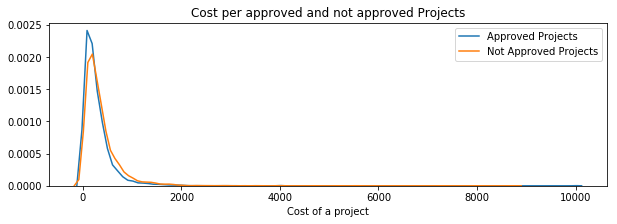

In [40]:
import seaborn as sns
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

### Drawing a conclusion is quiet difficult

In [41]:
!pip3 install --user prettytable

/bin/sh: 1: pip3: not found


In [42]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+--------------------+-----------------------+
| Percentile | Approved Projects  | Not Approved Projects |
+------------+--------------------+-----------------------+
|     0      |        0.66        |          2.79         |
|     5      |       13.59        |         43.694        |
|     10     |       34.07        |         74.952        |
|     15     |       58.444       |          99.5         |
|     20     |       77.736       |         118.26        |
|     25     |       99.98        |         140.63        |
|     30     |      116.929       |         160.97        |
|     35     | 137.92000000000002 |         183.13        |
|     40     |       157.0        |         207.71        |
|     45     |       178.47       |        233.904        |
|     50     |       198.99       |         261.86        |
|     55     |       223.97       |        290.512        |
|     60     | 255.48000000000002 |        322.574        |
|     65     |       284.95       |     

## Number of previously posted projects

In [43]:
approved_teacher_number_of_previously_posted_projects = train_data[train_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects'].values

rejected_teacher_number_of_previously_posted_projects = train_data[train_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values

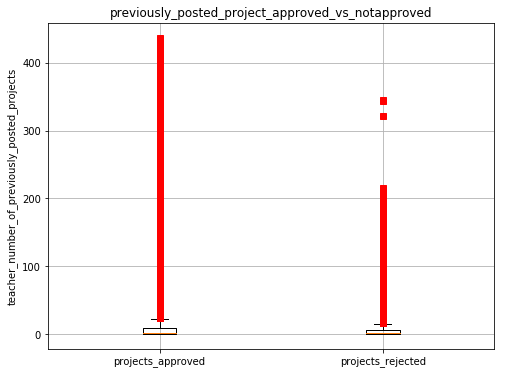

In [44]:
# sample code taken from https://stackoverflow.com/questions/24337726/draw-box-plot-with-matplotlib

import matplotlib.pyplot as plt

x1 = approved_teacher_number_of_previously_posted_projects
x2 = rejected_teacher_number_of_previously_posted_projects


fig = plt.figure(figsize=(8,6))

plt.boxplot([x for x in [x1, x2]], 0,'rs', 1)
plt.xticks([y+1 for y in range(len([x1, x2]))], ['projects_approved', 'projects_rejected'])
plt.ylabel('teacher_number_of_previously_posted_projects')
t = plt.title('previously_posted_project_approved_vs_notapproved')
plt.grid()
plt.show()

##### Cannot be concluded from the graph

In [45]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_teacher_number_of_previously_posted_projects,i), 3), np.round(np.percentile(rejected_teacher_number_of_previously_posted_projects,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.0        |          0.0          |
|     5      |        0.0        |          0.0          |
|     10     |        0.0        |          0.0          |
|     15     |        0.0        |          0.0          |
|     20     |        0.0        |          0.0          |
|     25     |        0.0        |          0.0          |
|     30     |        1.0        |          0.0          |
|     35     |        1.0        |          1.0          |
|     40     |        1.0        |          1.0          |
|     45     |        2.0        |          1.0          |
|     50     |        2.0        |          2.0          |
|     55     |        3.0        |          2.0          |
|     60     |        4.0        |          3.0          |
|     65     |        5.0        |          3.0         

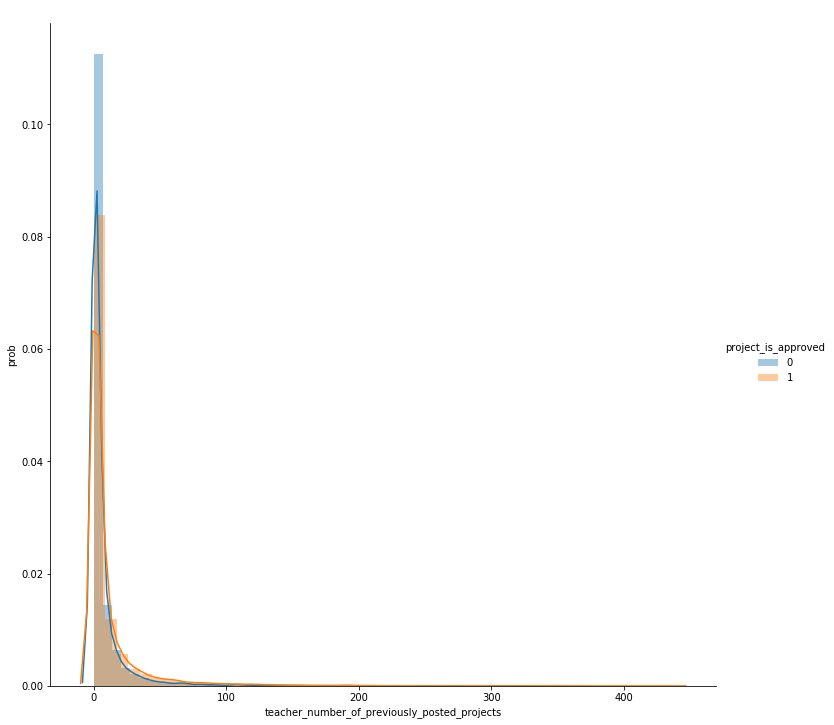

In [46]:

sns.FacetGrid(train_data, hue="project_is_approved", size=10) \
   .map(sns.distplot, "teacher_number_of_previously_posted_projects") \
   .add_legend();
plt.title(" ")
plt.ylabel('prob')

plt.show()


#### No conclusions can be drawn from the graph

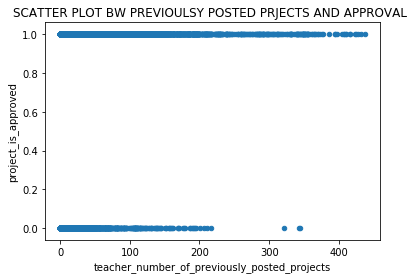

In [47]:
train_data.plot(kind='scatter',x='teacher_number_of_previously_posted_projects',y='project_is_approved')
plt.title('SCATTER PLOT BW PREVIOULSY POSTED PRJECTS AND APPROVAL ')
plt.show()


#### number of previously posted projects > 230 then project is approved

### project_resource_summary- precence of digits

In [48]:
y_value_counts = train_data['project_resource_summary'].values

In [49]:

digits_precense=[]

In [50]:
## https://stackoverflow.com/questions/19859282/check-if-a-string-contains-a-number

import re
def hasNumbers(inputString):
    return bool(re.search(r'\d', inputString))
for word in train_data['project_resource_summary']:
    
    if hasNumbers(word)==True:
        digits_precense.append(0)
    else:
        digits_precense.append(1)


In [51]:
train_data.insert(8,'digits_precense',digits_precense,  allow_duplicates = True)#del train_data['digits_precense']


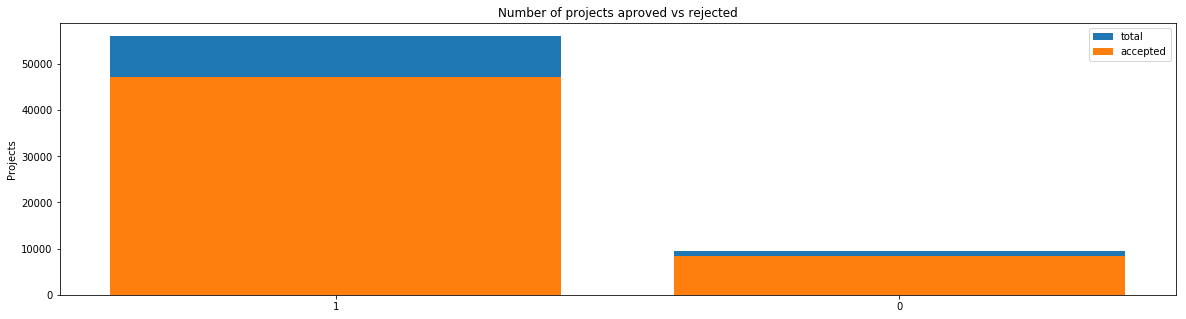

   digits_precense  project_is_approved  total       Avg
1                1                47143  56081  0.840623
0                0                 8441   9468  0.891529
   digits_precense  project_is_approved  total       Avg
1                1                47143  56081  0.840623
0                0                 8441   9468  0.891529


In [52]:
univariate_barplots(train_data, 'digits_precense', 'project_is_approved', False)

### From the above graph ,projects with digits are accepted more than without

# Text Preprocessing_Essaytext

In [53]:
train_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,digits_precense,project_subject_subcategories,...,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,quantity,price
46541,56301,p234543,6a4a7a092c8d890bb37dceec039cc4c7,Ms.,NY,2016-12-26 15:14:01,Grades 6-8,Math & Science,1,Mathematics,...,NaN,NaN,My students need to be able to use technology ...,1,0,MathScience,Mathematics,My students come from a low socioeconomic area...,20,174.1
95309,85225,p215871,418d283af2c8ff0866bd5803c8030c1a,Mrs.,CA,2016-09-01 00:41:41,Grades PreK-2,Literacy & Language,1,"ESL, Literacy",...,NaN,NaN,My students need a Leveled Classroom Library w...,2,1,LiteracyLanguage,ESLLiteracy,Many of my students do not have access to a va...,2,718.0


In [54]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [55]:
sent = decontracted(train_data['essay'].values[20001])
print(sent)
print("="*50)

As a teacher in a low-income/high poverty school district, my students are faced with several challenges both in and out of the classroom. Despite the many challenges they face, I am looking forward to introducing them to many aspects of the technology world that will foster imagination and a desire to break their generational poverty issues. \r\n\r\nIn order to close the achievement gap and bring them into our ever-changing technology filled world, I need the tools to make them feel successful and to start their path to learning excellence!Coming from a small, low-income rural community, my students struggle to get out of the immediate area in which they live. Some will never leave our small town. As their teacher, I have to do all I can to expose them to everything that could possibly help them to break the cycle of no education beyond middle and high school.\r\n\r\nI believe that with coding and the opportunity to explore their creativity in the Makerspace, my students will open doo

In [56]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

As a teacher in a low-income/high poverty school district, my students are faced with several challenges both in and out of the classroom. Despite the many challenges they face, I am looking forward to introducing them to many aspects of the technology world that will foster imagination and a desire to break their generational poverty issues.     In order to close the achievement gap and bring them into our ever-changing technology filled world, I need the tools to make them feel successful and to start their path to learning excellence!Coming from a small, low-income rural community, my students struggle to get out of the immediate area in which they live. Some will never leave our small town. As their teacher, I have to do all I can to expose them to everything that could possibly help them to break the cycle of no education beyond middle and high school.    I believe that with coding and the opportunity to explore their creativity in the Makerspace, my students will open doors never

In [57]:
re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

As a teacher in a low-income/high poverty school district, my students are faced with several challenges both in and out of the classroom. Despite the many challenges they face, I am looking forward to introducing them to many aspects of the technology world that will foster imagination and a desire to break their generational poverty issues.     In order to close the achievement gap and bring them into our ever-changing technology filled world, I need the tools to make them feel successful and to start their path to learning excellence!Coming from a small, low-income rural community, my students struggle to get out of the immediate area in which they live. Some will never leave our small town. As their teacher, I have to do all I can to expose them to everything that could possibly help them to break the cycle of no education beyond middle and high school.    I believe that with coding and the opportunity to explore their creativity in the Makerspace, my students will open doors never

In [58]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [59]:
!pip install --user tqdm

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [60]:
from tqdm import tqdm

In [61]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(train_data['essay'].values):
    sent = decontracted(sentance)
    sent= sent.lower()
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/55428
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 65549/65549 [00:32<00:00, 2033.33it/s]


In [62]:
# after preprocesing
preprocessed_essays[20000]

'teach science unlike academic subjects not grouped ability therefore classes hetergeneously mixed ability levels creates broad range gifted student students struggle reading comprehension students various learning disabilities school true melting pot nationalities backgrounds ethniticities cultures ability levels socioeconomic levels students opportunity learn not academics athletics fine arts better citizens world learning alongside different school almost 50 free reduced lunch therefore many students not come materials need school unable donate materials classroom donorschoose invaluable resource supporting classroom would not successful without donors like 7th grade science curriculum learn parts function compound light microscopes cells unit worksheets textbooks teach microscopes fun would learning microscopes without using many students learning use microscopes first time seventh grade project enable students learn use microscopes correctly confidently also give good variety star

# Title_text_Preprocessing

In [63]:


preprocessed_titles = []

for sentance in tqdm(train_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.lower()
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 65549/65549 [00:01<00:00, 47039.39it/s]


In [64]:
preprocessed_titles[1]

'mrs love class loves literacy'

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
sorted_cat_dict

{'Warmth': 1388,
 'CareHunger': 1388,
 'HistoryCivics': 5914,
 'MusicArts': 10293,
 'AppliedLearning': 12135,
 'SpecialNeeds': 13642,
 'HealthSports': 14223,
 'MathScience': 41421,
 'LiteracyLanguage': 52239}

In [67]:
project_grade_category_upd=[]
for word in train_data['project_grade_category']:
    word=str(word.replace('Grades','').strip())
    word=str(word.replace('6-8','sixth_eigth').strip())
    word=str(word.replace('3-5','three_five').strip())
    word=str(word.replace('9-12','nine_twelve').strip())
    project_grade_category_upd.append(word)
#print(project_grade_category_upd)
train_data['project_grade_category_upd']=project_grade_category_upd
train_data['project_grade_category_upd'].unique()

array(['sixth_eigth', 'PreK-2', 'three_five', 'nine_twelve'], dtype=object)

In [68]:
from sklearn.model_selection import train_test_split
train_data_y=train_data.pop('project_is_approved')
X_train, X_test, y_train, y_test = train_test_split(train_data, train_data_y,
                                                    stratify=train_data_y, 
                                                    test_size=0.15)

In [69]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,
                                                    stratify=y_train, 
                                                    test_size=0.15)

In [70]:
print(X_train.shape)
print(X_test.shape)


(47358, 23)
(9833, 23)


In [71]:
import pickle 
pickle.dump(X_train,open('X_train.p','wb'))
pickle.dump(X_test,open('X_test.p','wb'))


## one_hotencoding_categories

In [72]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)
fea_cat=(vectorizer.get_feature_names())
fea_cat=[str(r) for r in fea_cat ]




In [73]:
traincategories_one_hot = vectorizer.transform(X_train['clean_categories'].values)
testcategories_one_hot = vectorizer.transform(X_test['clean_categories'].values)
#cvcategories_one_hot = vectorizer.transform(X_cv['clean_categories'].values)
print("Shape of matrix after one hot encodig ",traincategories_one_hot.shape)

Shape of matrix after one hot encodig  (47358, 9)


## one_hotencoding_subcategories

In [74]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)
fea_subcat=(vectorizer.get_feature_names())



trainsub_categories_one_hot = vectorizer.transform(X_train['clean_subcategories'].values)
testsub_categories_one_hot = vectorizer.transform(X_test['clean_subcategories'].values)
#cvsub_categories_one_hot = vectorizer.transform(X_cv['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",trainsub_categories_one_hot.shape)

Shape of matrix after one hot encodig  (47358, 349)


In [75]:
fea_subcat=[str(r) for r in fea_subcat ]

## one_hotencoding_state

In [76]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)
fea_state=(vectorizer.get_feature_names())


trainsub_school_state_hot = vectorizer.transform(X_train['school_state'].values)
testsub_school_state_hot = vectorizer.transform(X_test['school_state'].values)
#cvsub_school_state_hot = vectorizer.transform(X_cv['school_state'].values)
print("Shape of matrix after one hot encodig ",testsub_school_state_hot.shape)

Shape of matrix after one hot encodig  (9833, 51)


In [77]:
trainsub_school_state_hot.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [78]:
fea_state=[str(r) for r in fea_state ]

## one_hotencoding_teacherprefix

In [79]:
# https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas
vectorizer = CountVectorizer(encoding='string',decode_error='ignore',lowercase=False, binary=True)
vectorizer.fit((X_train['teacher_prefix'].astype(str)).values)
fea_teacherprefix=(vectorizer.get_feature_names())


trainteacher_prefix_one_hot = vectorizer.transform((X_train['teacher_prefix'].astype(str)).values)
testteacher_prefix_one_hot = vectorizer.transform((X_test['teacher_prefix'].astype(str)).values)
#cvteacher_prefix_one_hot = vectorizer.transform((X_cv['teacher_prefix'].astype(str)).values)
print("Shape of matrix after one hot encodig ",testteacher_prefix_one_hot.shape)

Shape of matrix after one hot encodig  (9833, 6)


In [80]:
fea_teacherprefix=[str(r) for r in fea_teacherprefix ]

In [81]:
train_data['teacher_prefix'].unique()

array(['Ms.', 'Mrs.', 'Mr.', 'Teacher', 'Dr.', nan], dtype=object)

## one_hotencoding_project_grade_category

In [82]:
# https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit((X_train['project_grade_category_upd'].astype(str)).values)
fea_project_grade_category=(vectorizer.get_feature_names())


trainproject_grade_category_upd_one_hot = vectorizer.transform((X_train['project_grade_category_upd'].astype(str)).values)
testproject_grade_category_upd_one_hot = vectorizer.transform((X_test['project_grade_category_upd'].astype(str)).values)
#cvproject_grade_category_upd_one_hot = vectorizer.transform((X_cv['project_grade_category_upd'].astype(str)).values)

print("Shape of matrix after one hot encodig ",testproject_grade_category_upd_one_hot.shape)

Shape of matrix after one hot encodig  (9833, 4)


In [83]:
fea_project_grade_category=[str(r) for r in fea_project_grade_category ]

### text_bow_essay

In [84]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features=5000,ngram_range=(1,2))


X_train_essay_bow = vectorizer.fit_transform(X_train['essay'])
fea_essay_bow=(vectorizer.get_feature_names())
X_test_essay_bow = vectorizer.transform(X_test['essay'])
#X_cv_essay_bow = vectorizer.transform(X_cv['essay'])


In [85]:
fea_essay_bow=[str(r) for r in fea_essay_bow ]

### title_bow

In [86]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features=5000,ngram_range=(1,2))
X_train_title_bow = vectorizer.fit_transform(X_train['project_title'])
fea_title_bow=(vectorizer.get_feature_names())
X_test_title_bow = vectorizer.transform(X_test['project_title'])
#X_cv_title_bow = vectorizer.transform(X_cv['project_title'])


In [87]:
fea_title_bow=[str(r) for r in fea_title_bow ]

## tfidf_essay

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1,2))
X_train_essay_tfidf = vectorizer.fit_transform(X_train['essay'])
fea_essay_tfidf=(vectorizer.get_feature_names())
X_test_essay_tfidf = vectorizer.transform(X_test['essay'])
#X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'])


### tfidf_title

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1,2))
X_train_title_tfidf = vectorizer.fit_transform(X_train['project_title'])
fea_title_tfidf=(vectorizer.get_feature_names())
X_test_title_tfidf = vectorizer.transform(X_test['project_title'])
#X_cv_title_tfidf = vectorizer.transform(X_cv['project_title'])


In [90]:
X_train_title_tfidf

<47358x4594 sparse matrix of type '<class 'numpy.float64'>'
	with 294106 stored elements in Compressed Sparse Row format>

In [91]:

# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')


words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)




591it [00:00, 5909.50it/s]

Loading Glove Model


1917494it [02:41, 11876.59it/s]


Done. 1917494  words loaded!
all the words in the coupus 9295561
the unique words in the coupus 47958
The number of words that are present in both glove vectors and our coupus 43168 ( 90.012 %)
word 2 vec length 43168


In [92]:

tfidf_model = TfidfVectorizer()
tfidf_model.fit((X_train['essay']))
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [93]:
# average Word2Vec
# compute average word2vec for each review.
X_train_tfidf_w2v_vectors_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in words_glove) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_vectors_essay.append(vector)

print(len(X_train_tfidf_w2v_vectors_essay))
print(len(X_train_tfidf_w2v_vectors_essay[0]))

100%|██████████| 47358/47358 [02:48<00:00, 280.40it/s]

47358
300


In [94]:
X_test_tfidf_w2v_vectors_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in words_glove) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_vectors_essay.append(vector)

print(len(X_test_tfidf_w2v_vectors_essay))
print(len(X_test_tfidf_w2v_vectors_essay[0]))

100%|██████████| 9833/9833 [00:34<00:00, 284.18it/s]

9833
300


In [95]:
'''
X_cv_tfidf_w2v_vectors_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in words_glove) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_tfidf_w2v_vectors_essay.append(vector)

print(len(X_cv_tfidf_w2v_vectors_essay))
print(len(X_cv_tfidf_w2v_vectors_essay[0]))'''

"\nX_cv_tfidf_w2v_vectors_essay = []; # the avg-w2v for each sentence/review is stored in this list\nfor sentence in tqdm(X_cv['essay']): # for each review/sentence\n    vector = np.zeros(300) # as word vectors are of zero length\n    tf_idf_weight =0; # num of words with a valid vector in the sentence/review\n    for word in sentence.split(): # for each word in a review/sentence\n        if (word in words_glove) and (word in tfidf_words):\n            vec = model[word] # getting the vector for each word\n            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))\n            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word\n            vector += (vec * tf_idf) # calculating tfidf weighted w2v\n            tf_idf_weight += tf_idf\n    if tf_idf_weight != 0:\n        vector /= tf_idf_weight\n    X_cv_tfidf_w2v_vectors_essay.append(vector)\n\nprint(len(X_cv_

In [96]:

tfidf_model = TfidfVectorizer()
tfidf_model.fit((X_train['project_title']))
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [97]:
# average Word2Vec
# compute average word2vec for each review.
X_train_tfidf_w2v_vectors_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in words_glove) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_vectors_project_title.append(vector)

print(len(X_train_tfidf_w2v_vectors_project_title))
print(len(X_train_tfidf_w2v_vectors_project_title[0]))

100%|██████████| 47358/47358 [00:00<00:00, 87315.54it/s]

47358
300


In [98]:
X_test_tfidf_w2v_vectors_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in words_glove) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_vectors_project_title.append(vector)

print(len(X_test_tfidf_w2v_vectors_project_title))
print(len(X_test_tfidf_w2v_vectors_project_title[0]))

100%|██████████| 9833/9833 [00:00<00:00, 82823.43it/s]

9833
300


In [99]:
''''
X_cv_tfidf_w2v_vectors_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in words_glove) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_tfidf_w2v_vectors_project_title.append(vector)

print(len(X_cv_tfidf_w2v_vectors_project_title))
print(len(X_cv_tfidf_w2v_vectors_project_title[0]))'''

"'\nX_cv_tfidf_w2v_vectors_project_title = []; # the avg-w2v for each sentence/review is stored in this list\nfor sentence in tqdm(X_cv['project_title']): # for each review/sentence\n    vector = np.zeros(300) # as word vectors are of zero length\n    tf_idf_weight =0; # num of words with a valid vector in the sentence/review\n    for word in sentence.split(): # for each word in a review/sentence\n        if (word in words_glove) and (word in tfidf_words):\n            vec = model[word] # getting the vector for each word\n            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))\n            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word\n            vector += (vec * tf_idf) # calculating tfidf weighted w2v\n            tf_idf_weight += tf_idf\n    if tf_idf_weight != 0:\n        vector /= tf_idf_weight\n    X_cv_tfidf_w2v_vectors_project_title.append(v

#### w2v-avg

In [100]:
# average Word2Vec
# compute average word2vec for each review.
X_train_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in words_glove:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_title_avg_w2v_vectors.append(vector)

print(len(X_train_title_avg_w2v_vectors))
print(len(X_train_title_avg_w2v_vectors[0]))

100%|██████████| 47358/47358 [00:00<00:00, 124415.44it/s]

47358
300


In [101]:
# average Word2Vec
# compute average word2vec for each review.
X_train_essay_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in words_glove:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_essay_avg_w2v_vectors.append(vector)

print(len(X_train_essay_avg_w2v_vectors))
print(len(X_train_essay_avg_w2v_vectors[0]))

100%|██████████| 47358/47358 [00:15<00:00, 3022.52it/s]

47358
300


In [102]:
# average Word2Vec
# compute average word2vec for each review.
X_test_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in words_glove:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_title_avg_w2v_vectors.append(vector)

print(len(X_test_title_avg_w2v_vectors))
print(len(X_test_title_avg_w2v_vectors[0]))

100%|██████████| 9833/9833 [00:00<00:00, 124454.84it/s]

9833
300


In [103]:
# average Word2Vec
# compute average word2vec for each review.
X_test_essay_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in words_glove:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_essay_avg_w2v_vectors.append(vector)

print(len(X_test_essay_avg_w2v_vectors))
print(len(X_test_essay_avg_w2v_vectors[0]))

100%|██████████| 9833/9833 [00:03<00:00, 2986.86it/s]

9833
300


In [104]:
''''
# average Word2Vec
# compute average word2vec for each review.
X_cv_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in words_glove:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_title_avg_w2v_vectors.append(vector)

print(len(X_cv_title_avg_w2v_vectors))
print(len(X_cv_title_avg_w2v_vectors[0]))'''

"'\n# average Word2Vec\n# compute average word2vec for each review.\nX_cv_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list\nfor sentence in tqdm(X_cv['project_title']): # for each review/sentence\n    vector = np.zeros(300) # as word vectors are of zero length\n    cnt_words =0; # num of words with a valid vector in the sentence/review\n    for word in sentence.split(): # for each word in a review/sentence\n        if word in words_glove:\n            vector += model[word]\n            cnt_words += 1\n    if cnt_words != 0:\n        vector /= cnt_words\n    X_cv_title_avg_w2v_vectors.append(vector)\n\nprint(len(X_cv_title_avg_w2v_vectors))\nprint(len(X_cv_title_avg_w2v_vectors[0]))"

In [105]:
'''
# average Word2Vec
# compute average word2vec for each review.
X_cv_essay_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in words_glove:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_essay_avg_w2v_vectors.append(vector)

print(len(X_cv_essay_avg_w2v_vectors))
print(len(X_cv_essay_avg_w2v_vectors[0]))
'''

"\n# average Word2Vec\n# compute average word2vec for each review.\nX_cv_essay_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list\nfor sentence in tqdm(X_cv['essay']): # for each review/sentence\n    vector = np.zeros(300) # as word vectors are of zero length\n    cnt_words =0; # num of words with a valid vector in the sentence/review\n    for word in sentence.split(): # for each word in a review/sentence\n        if word in words_glove:\n            vector += model[word]\n            cnt_words += 1\n    if cnt_words != 0:\n        vector /= cnt_words\n    X_cv_essay_avg_w2v_vectors.append(vector)\n\nprint(len(X_cv_essay_avg_w2v_vectors))\nprint(len(X_cv_essay_avg_w2v_vectors[0]))\n"

### Price Normalisation

In [106]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Normalizer  

#http://benalexkeen.com/feature-scaling-with-scikit-learn/

In [107]:


price_scalar=Normalizer()



In [108]:
price_scalar



Normalizer(copy=True, norm='l2')

In [109]:
X_train_price_standardized = price_scalar.fit_transform(X_train['price'].values.reshape(1, -1))
print(X_train_price_standardized)


[[0.00041895 0.00482911 0.00205604 ... 0.00493508 0.00413986 0.00072545]]


In [110]:
X_test_price_standardized = price_scalar.transform(X_test['price'].values.reshape(1,-1))
#X_cv_price_standardized = price_scalar.transform(X_cv['price'].values.reshape(1,-1))

### Standardising previously posted projects

In [111]:

teacher_number_of_previously_posted_projects_scalar = Normalizer()
teacher_number_of_previously_posted_projects_scalar.fit(train_data['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

X_train_teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
#X_cv_teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

In [112]:
X_test_teacher_number_of_previously_posted_projects_standardized

array([[0.00947972, 0.00842642, 0.        , ..., 0.00421321, 0.03089687,
        0.00315991]])

In [113]:
list_features=[]
features=[fea_cat,fea_subcat,fea_project_grade_category,fea_title_bow,fea_essay_bow,'price','teacher_number_of_previously_posted_projects']
for i in features:
    list_features.extend(i)

    

#### BOW_STACKING

In [114]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x1_train = hstack((traincategories_one_hot, trainsub_categories_one_hot,trainproject_grade_category_upd_one_hot,X_train_title_bow,X_train_essay_bow,X_train_price_standardized.reshape(-1,1),X_train_teacher_number_of_previously_posted_projects_standardized.reshape(-1,1)))
x1_test=hstack((testcategories_one_hot, testsub_categories_one_hot,testproject_grade_category_upd_one_hot,X_test_title_bow,X_test_essay_bow,X_test_price_standardized.reshape(-1,1),X_test_teacher_number_of_previously_posted_projects_standardized.reshape(-1,1)))
#x1_cv=hstack((cvcategories_one_hot, cvsub_categories_one_hot,cvproject_grade_category_upd_one_hot,X_cv_title_bow,X_cv_essay_bow,X_cv_price_standardized.reshape(-1,1),X_cv_teacher_number_of_previously_posted_projects_standardized.reshape(-1,1)))


In [115]:
len(list_features)

10005

#### TFIDF_STACKING

In [116]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x2_train = hstack((traincategories_one_hot, trainsub_categories_one_hot,trainproject_grade_category_upd_one_hot,X_train_title_tfidf,X_train_essay_tfidf,X_train_price_standardized.reshape(-1,1),X_train_teacher_number_of_previously_posted_projects_standardized.reshape(-1,1)))
x2_test=hstack((testcategories_one_hot, testsub_categories_one_hot,testproject_grade_category_upd_one_hot,X_test_title_tfidf,X_test_essay_tfidf,X_test_price_standardized.reshape(-1,1),X_test_teacher_number_of_previously_posted_projects_standardized.reshape(-1,1)))
#x2_cv=hstack((cvcategories_one_hot, cvsub_categories_one_hot,cvproject_grade_category_upd_one_hot,X_cv_title_tfidf,X_cv_essay_tfidf,X_cv_price_standardized.reshape(-1,1),X_cv_teacher_number_of_previously_posted_projects_standardized.reshape(-1,1)))


In [117]:
x1_train.shape

(47358, 9958)

In [118]:
#x1_cv.shape

In [119]:
x1_test.shape

(9833, 9958)

#### TFIDF W2V -STACKING

In [120]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x3_train = hstack((traincategories_one_hot, trainsub_categories_one_hot,trainproject_grade_category_upd_one_hot,X_train_tfidf_w2v_vectors_project_title,X_train_tfidf_w2v_vectors_essay,X_train_price_standardized.reshape(-1,1),X_train_teacher_number_of_previously_posted_projects_standardized.reshape(-1,1)))
x3_test=hstack((testcategories_one_hot, testsub_categories_one_hot,testproject_grade_category_upd_one_hot,X_test_tfidf_w2v_vectors_project_title,X_test_tfidf_w2v_vectors_essay,X_test_price_standardized.reshape(-1,1),X_test_teacher_number_of_previously_posted_projects_standardized.reshape(-1,1)))
#x3_cv=hstack((cvcategories_one_hot, cvsub_categories_one_hot,cvproject_grade_category_upd_one_hot,X_cv_tfidf_w2v_vectors_project_title,X_cv_tfidf_w2v_vectors_essay,X_cv_price_standardized.reshape(-1,1),X_cv_teacher_number_of_previously_posted_projects_standardized.reshape(-1,1)))


W2V STACKING

In [121]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x4_train = hstack((traincategories_one_hot, trainsub_categories_one_hot,trainproject_grade_category_upd_one_hot,X_train_essay_avg_w2v_vectors,X_train_title_avg_w2v_vectors,X_train_price_standardized.reshape(-1,1),X_train_teacher_number_of_previously_posted_projects_standardized.reshape(-1,1)))
x4_test=hstack((testcategories_one_hot, testsub_categories_one_hot,testproject_grade_category_upd_one_hot,X_test_essay_avg_w2v_vectors,X_test_title_avg_w2v_vectors,X_test_price_standardized.reshape(-1,1),X_test_teacher_number_of_previously_posted_projects_standardized.reshape(-1,1)))
#x4_cv=hstack((cvcategories_one_hot, cvsub_categories_one_hot,cvproject_grade_category_upd_one_hot,X_cv_essay_avg_w2v_vectors,X_cv_title_avg_w2v_vectors,X_cv_price_standardized.reshape(-1,1),X_cv_teacher_number_of_previously_posted_projects_standardized.reshape(-1,1)))


In [122]:
import pickle

In [123]:
pickle.dump(x1_train,open('x1_train.p','wb'))
pickle.dump(x2_train,open('x2_train.p','wb'))
pickle.dump(x3_train,open('x3_train.p','wb'))
pickle.dump(x4_train,open('x4_train.p','wb'))

pickle.dump(x1_test,open('x1_test.p','wb'))
pickle.dump(x2_test,open('x2_test.p','wb'))
pickle.dump(x3_test,open('x3_test.p','wb'))
pickle.dump(x4_test,open('x4_test.p','wb'))



# BOW

### GRIDSEARCH

In [8]:
#https://stackoverflow.com/questions/37689942/grid-search-finding-parameters-for-auc
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import numpy as np
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


In [197]:
import pickle

# prepare a range of alpha values to test
alphas = [{'C':[0.001,0.01,0.1,1,10,100,1000]}]
# create and fit a ridge regression model, testing each alpha
model = LogisticRegression(class_weight='balanced')
k_f=10   
grid = GridSearchCV(estimator=model,cv=k_f, param_grid=alphas,scoring='roc_auc',n_jobs=-1)
grid.fit(x1_train, y_train)

pickle.dump(grid, open('grid.p', 'wb'))
best_est=grid.best_estimator_
print(best_est)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


In [1]:
import pickle

In [3]:
pickle.load(open('grid.p','rb'))

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [198]:
grid.cv_results_

{'mean_fit_time': array([  6.45648615,  14.37466602,  33.19103603,  85.42369652,
        230.87080793, 347.24905427, 700.55688646]),
 'std_fit_time': array([  0.96341672,   0.5766438 ,   1.54065258,   2.20390323,
         54.3940407 , 102.02265612, 247.50987343]),
 'mean_score_time': array([0.0179656 , 0.02035861, 0.01138251, 0.00844557, 0.00778792,
        0.00795505, 0.01110644]),
 'std_score_time': array([0.00614544, 0.00624811, 0.0060505 , 0.00175631, 0.00081909,
        0.00281058, 0.00594255]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.69665781, 0.68566256, 0.66352126, 0.6450552 , 0.62786597,
        0.62362633, 0.62316256]),
 'split1_test_score': array([0.71315156, 0.69969877, 0.66996251, 0.6478

In [5]:
(train_auc)=[0.78812259, 0.84960424, 0.88880454, 0.92176342, 0.93668734,
        0.93973672, 0.94227737]
(test_auc)=[0.70781283, 0.6934392 , 0.66710284, 0.64753933, 0.63061186,
        0.62348196, 0.61772681]
c_values=[0.001,0.01,0.1,1,10,100,1000]

In [6]:
import math as m 
xaxis=[]
for x in list(c_values):
    
    a=m.log(x,10)
    xaxis.append(a)
print(xaxis)    

[-2.9999999999999996, -1.9999999999999996, -0.9999999999999998, 0.0, 1.0, 2.0, 2.9999999999999996]


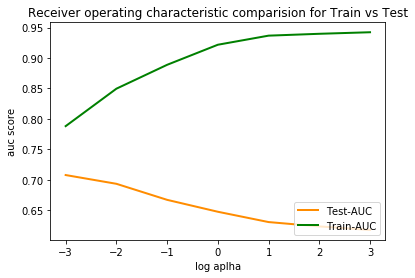

In [7]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(xaxis,test_auc, color='darkorange',
         lw=lw, label='Test-AUC')
plt.plot(xaxis, train_auc, color='green',
         lw=lw, label='Train-AUC')

#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('log aplha')
plt.ylabel('auc score')
plt.title('Receiver operating characteristic comparision for Train vs Test')
plt.legend(loc="lower right")
plt.show()

In [12]:
pickle.load(open('x1_train.p','rb'))
pickle.load(open('x2_train.p','rb'))
pickle.load(open('x3_train.p','rb'))
pickle.load(open('x4_train.p','rb'))
pickle.load(open('x1_test.p','rb'))
pickle.load(open('x2_test.p','rb'))
pickle.load(open('x3_test.p','rb'))
pickle.load(open('x4_test','rb'))

<8194x956 sparse matrix of type '<class 'numpy.float64'>'
	with 4001661 stored elements in COOrdinate format>

### ROC_AUC

In [141]:



clf = LogisticRegression(C=0.001,class_weight='balanced')
clf.fit(x1_train, y_train)



LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [142]:
ytest_predict=(clf.predict(x1_test))
ytrain_predict=(clf.predict(x1_train))

In [143]:
ytest_predictproba=(clf.predict_proba(x1_test))
ytrain_predictproba=(clf.predict_proba(x1_train))

In [144]:
from sklearn.metrics import roc_auc_score
test_aucscore=0
train_aucscore=0

In [145]:
test_aucscore=roc_auc_score(y_test, ytest_predictproba[:,1], average=None, sample_weight=None, max_fpr=None)
train_aucscore=roc_auc_score(y_train, ytrain_predictproba[:,1], average=None, sample_weight=None, max_fpr=None)

In [146]:
print(test_aucscore)
print(train_aucscore)

0.7124879365214343
0.7868126786660613


In [147]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
import numpy as np
from sklearn import metrics


test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test,ytest_predictproba[:,1] )
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train,ytrain_predictproba[:,1] )



In [148]:
print(ytest_predictproba[:,1])

[0.35451019 0.51359388 0.53822867 ... 0.3720235  0.4718692  0.69934671]


#### AUC_CURVE

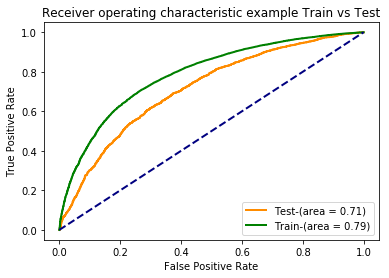

In [149]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test-(area = %0.2f)' % test_aucscore)
plt.plot(train_fpr, train_tpr, color='green',
         lw=lw, label='Train-(area = %0.2f)' % train_aucscore)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Train vs Test')
plt.legend(loc="lower right")
plt.show()

#### 71 percent of the points are correctly classified as their respective classes (from the true values)

### Confusion matrix 

In [150]:
#https://scikit-learn.org/0.17/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix

In [151]:
test_confusionmatrix=confusion_matrix(y_test, ytest_predict, labels=None)

In [152]:
train_confusionmatrix=confusion_matrix(y_train, ytrain_predict, labels=None)

In [153]:
print(test_confusionmatrix)

[[ 941  554]
 [2644 5694]]


In [154]:
print(train_confusionmatrix)

[[ 5251  1948]
 [11678 28481]]


In [155]:
from matplotlib.pyplot import matshow


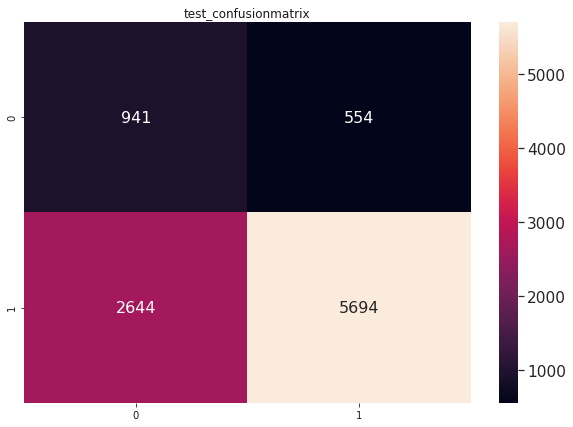

In [156]:
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = test_confusionmatrix
df_cm = pd.DataFrame(array, index = [0,1],
                  columns = [0,1])
plt.figure(figsize = (10,7))
plt.title('test_confusionmatrix')
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='d')

plt.show()

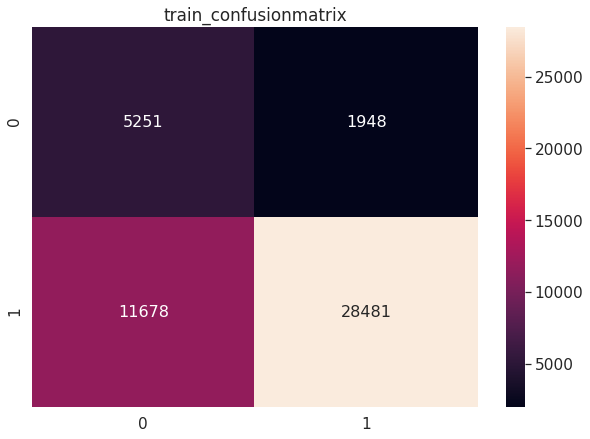

In [157]:
array = train_confusionmatrix
df_cm = pd.DataFrame(array, index = [0,1],
                  columns = [0,1])
plt.figure(figsize = (10,7))
plt.title('train_confusionmatrix')

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='d')

plt.show()

# TFIDF-AUC

##### GRID_SEARCH_TFIDF

In [237]:
import pickle

# prepare a range of alpha values to test
alphas = [{'C':[0.001,0.01,0.1,1,10,100,1000]}]
# create and fit a ridge regression model, testing each alpha
model = LogisticRegression(class_weight='balanced')
k_f=10   
grid_tfidf = GridSearchCV(estimator=model,cv=k_f, param_grid=alphas,scoring='roc_auc',n_jobs=-1)
grid_tfidf.fit(x2_train, y_train)

pickle.dump(grid_tfidf, open('grid_tfidf.p', 'wb'))
best_est=grid_tfidf.best_estimator_
print(best_est)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


In [238]:
grid_tfidf.cv_results_

{'mean_fit_time': array([  2.04174747,   4.27470212,   8.30798466,  18.09398844,
         37.58807817,  75.16787505, 141.17469482]),
 'std_fit_time': array([ 0.21908558,  0.2859071 ,  0.70308104,  0.57702777,  2.30718142,
         6.80963423, 21.44427208]),
 'mean_score_time': array([0.01123645, 0.01691527, 0.0110085 , 0.00799043, 0.00873387,
        0.00607362, 0.00506885]),
 'std_score_time': array([0.00588958, 0.00755659, 0.0040163 , 0.00124639, 0.00335105,
        0.00190911, 0.00091848]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.58103938, 0.6578042 , 0.70578519, 0.69054165, 0.65190523,
        0.62603267, 0.61440419]),
 'split1_test_score': array([0.57772486, 0.65506654, 0.70378279, 0.69024527, 0

In [158]:
pickle.load(open('grid_tfidf.p','rb'))

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [239]:
'''
c_values=np.array([0.001,0.01,0.1,1,10,100,1000])
from sklearn.metrics import roc_auc_score
cv_auc=[]
train_auc=[]
for k in c_values:
    
    clf = LogisticRegression(C=k,class_weight='balanced')
    clf.fit(x2_train, y_train)
    ycv_predict=(clf.predict(x2_cv))
    ytrain_predict=(clf.predict(x2_train))
    ycv_predictproba=(clf.predict_proba(x2_cv))
    ytrain_predictproba=(clf.predict_proba(x2_train))
    cv_aucscore=roc_auc_score(y_cv, ycv_predictproba[:,1], average=None, sample_weight=None, max_fpr=None)
    train_aucscore=roc_auc_score(y_train, ytrain_predictproba[:,1], average=None, sample_weight=None, max_fpr=None)
    cv_auc.append(cv_aucscore)
    train_auc.append(train_aucscore)
print(train_auc)'''

[0.5958580633785122, 0.7013576150097154, 0.8050783816369105, 0.8828467181196169, 0.9180671627474842, 0.9272025470528508, 0.9286884761562856]


In [162]:
c_values=[0.001,0.01,0.1,1,10,100,1000]
train_auc=[0.59399831, 0.69857899, 0.80770225, 0.8901662 , 0.92898394,
        0.9407636 , 0.94358546]
test_auc=[0.57860558, 0.65395637, 0.70501061, 0.6906908 , 0.6529259 ,
        0.62843867, 0.61751481]

In [163]:
xaxis=[]
for x in list(c_values):
    
    a=m.log(x,10)
    xaxis.append(a)
print(xaxis)    

print(train_auc)
print(test_auc)

[-2.9999999999999996, -1.9999999999999996, -0.9999999999999998, 0.0, 1.0, 2.0, 2.9999999999999996]
[0.78812259, 0.84960424, 0.88880454, 0.92176342, 0.93668734, 0.93973672, 0.94227737]
[0.70781283, 0.6934392, 0.66710284, 0.64753933, 0.63061186, 0.62348196, 0.61772681]


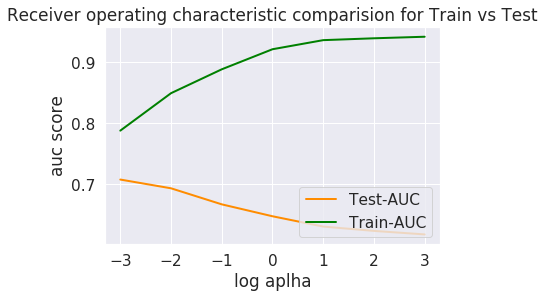

In [164]:

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(xaxis,test_auc, color='darkorange',
         lw=lw, label='Test-AUC')
plt.plot(xaxis, train_auc, color='green',
         lw=lw, label='Train-AUC')

#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('log aplha')
plt.ylabel('auc score')
plt.title('Receiver operating characteristic comparision for Train vs Test')
plt.legend(loc="lower right")
plt.show() 

###  auc_score_TFIDF

In [162]:



clf = LogisticRegression(C=0.1,class_weight='balanced',n_jobs=-1)
clf.fit(x2_train, y_train)

ytest_predict=(clf.predict(x2_test))
ytrain_predict=(clf.predict(x2_train))

ytest_predictproba=(clf.predict_proba(x2_test))
ytrain_predictproba=(clf.predict_proba(x2_train))

from sklearn.metrics import roc_auc_score
test_aucscore=0
train_aucscore=0

test_aucscore=roc_auc_score(y_test, ytest_predictproba[:,1], average=None, sample_weight=None, max_fpr=None)
train_aucscore=roc_auc_score(y_train, ytrain_predictproba[:,1], average=None, sample_weight=None, max_fpr=None)

print(test_aucscore)
print(train_aucscore)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
import numpy as np
from sklearn import metrics


test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test,ytest_predictproba[:,1] )
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train,ytrain_predictproba[:,1] )

print(ytest_predictproba[:,1])
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py


0.7101353275610474
0.8049700731023547
[0.5468091  0.54798467 0.42790288 ... 0.41665057 0.52030919 0.50444668]


#### AUC_CURVE

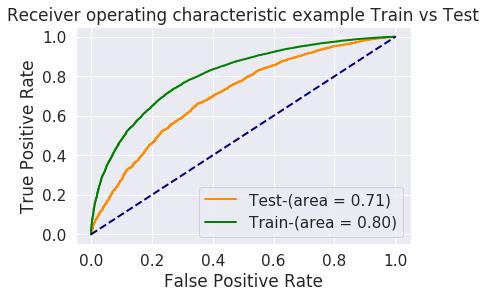

In [166]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test-(area = %0.2f)' % test_aucscore)
plt.plot(train_fpr, train_tpr, color='green',
         lw=lw, label='Train-(area = %0.2f)' % train_aucscore)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Train vs Test')
plt.legend(loc="lower right")
plt.show()

#### Seventy One  percent of the data points are correctly classified as their respective classes (from the true values)

#### Confusion Matrix

In [167]:
test_confusionmatrix=confusion_matrix(y_test, ytest_predict, labels=None)
train_confusionmatrix=confusion_matrix(y_train, ytrain_predict, labels=None)

In [168]:
print(test_confusionmatrix)

[[ 915  580]
 [2600 5738]]


In [169]:
print(test_confusionmatrix)

[[ 915  580]
 [2600 5738]]


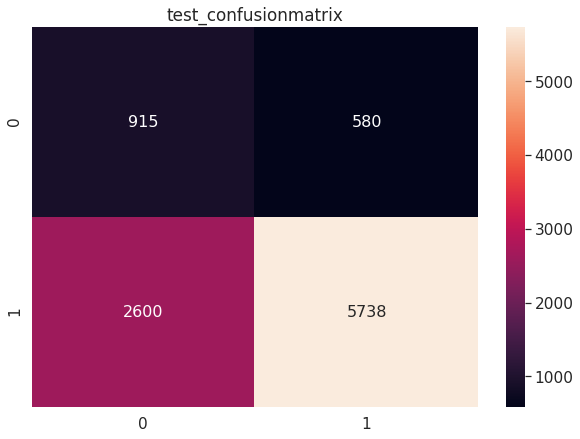

In [170]:
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = test_confusionmatrix
df_cm = pd.DataFrame(array, index = [0,1],
                  columns = [0,1])
plt.figure(figsize = (10,7))
plt.title("test_confusionmatrix")
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='d')

plt.show()

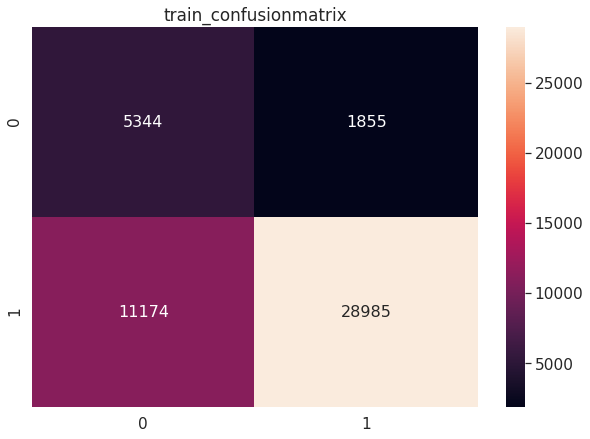

In [171]:
array = train_confusionmatrix
df_cm = pd.DataFrame(array, index = [0,1],
                  columns = [0,1])
plt.figure(figsize = (10,7))
plt.title("train_confusionmatrix")
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='d')

plt.show()

# TFIDF_W2V

In [127]:
import pickle

# prepare a range of alpha values to test
alphas = [{'C':[0.001,0.01,0.1,1,10,100,1000]}]
# create and fit a ridge regression model, testing each alpha
model = LogisticRegression(class_weight='balanced')
k_f=10   
grid_tfidfw2v = GridSearchCV(estimator=model,cv=k_f, param_grid=alphas,scoring='roc_auc',n_jobs=-1)
grid_tfidfw2v.fit(x3_train, y_train)

pickle.dump(grid_tfidfw2v, open('grid_tfidfw2v.p', 'wb'))
best_est=grid_tfidfw2v.best_estimator_
print(best_est)

LogisticRegression(C=1000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


In [128]:
grid_tfidfw2v.cv_results_

{'mean_fit_time': array([  6.67435787,  16.15731678,  29.55554974,  72.22089262,
        144.4531204 , 291.1544009 , 440.94880533]),
 'std_fit_time': array([ 1.4251304 ,  3.4343996 ,  7.48724911, 18.25526314, 31.79601892,
        55.55000188, 45.71120958]),
 'mean_score_time': array([0.01426532, 0.0166707 , 0.01385942, 0.01275506, 0.01259155,
        0.01569664, 0.00979424]),
 'std_score_time': array([0.00242854, 0.00343301, 0.00357435, 0.00240582, 0.00197867,
        0.0122863 , 0.0062196 ]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.58208658, 0.64556669, 0.67787945, 0.6855761 , 0.68549656,
        0.68554739, 0.68547235]),
 'split1_test_score': array([0.5789021 , 0.63074784, 0.66548148, 0.6694818 , 0

In [129]:
'''
c_values=np.array([0.001,0.01,0.1,1,10,100,1000])
from sklearn.metrics import roc_auc_score
cv_auc=[]
train_auc=[]
for k in c_values:
    
    clf = LogisticRegression(C=k,class_weight='balanced',n_jobs=-1)
    clf.fit(x3_train, y_train)
    ycv_predict=(clf.predict(x3_cv))
    ytrain_predict=(clf.predict(x3_train))
    ycv_predictproba=(clf.predict_proba(x3_cv))
    ytrain_predictproba=(clf.predict_proba(x3_train))
    cv_aucscore=roc_auc_score(y_cv, ycv_predictproba[:,1], average=None, sample_weight=None, max_fpr=None)
    train_aucscore=roc_auc_score(y_train, ytrain_predictproba[:,1], average=None, sample_weight=None, max_fpr=None)
    cv_auc.append(cv_aucscore)
    train_auc.append(train_aucscore)
print(train_auc)'''

[0.6105230631700582, 0.6675463054915124, 0.7032873194173317, 0.7192573812746229, 0.7262597489744207, 0.7288052529049507, 0.7291110660516862]


In [124]:
test_auc=[0.59746187, 0.64638244, 0.67037194, 0.67185934, 0.67207473,
        0.67398878, 0.67414656]
train_auc=[0.60868743, 0.66643677, 0.70398912, 0.72133189, 0.72861921,
        0.73133956, 0.73167944]
c_values=[0.001,0.01,0.1,1,10,100,1000]

In [125]:
import math as m 

In [126]:
xaxis=[]
for x in list(c_values):
    
    a=m.log(x,10)
    xaxis.append(a)
print(xaxis)    


print(train_auc)

[-2.9999999999999996, -1.9999999999999996, -0.9999999999999998, 0.0, 1.0, 2.0, 2.9999999999999996]
[0.60868743, 0.66643677, 0.70398912, 0.72133189, 0.72861921, 0.73133956, 0.73167944]


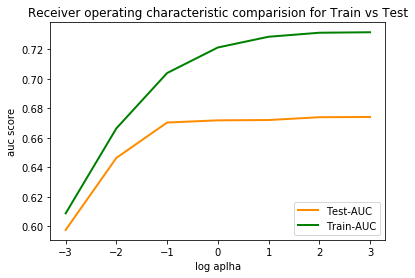

In [127]:

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(xaxis,test_auc, color='darkorange',
         lw=lw, label='Test-AUC')
plt.plot(xaxis, train_auc, color='green',
         lw=lw, label='Train-AUC')

#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('log aplha')
plt.ylabel('auc score')
plt.title('Receiver operating characteristic comparision for Train vs Test')
plt.legend(loc="lower right")
plt.show() 

###  auc_score_TFIDF

In [195]:



clf = LogisticRegression(C=1000,class_weight='balanced')
clf.fit(x3_train, y_train)

ytest_predict=(clf.predict(x3_test))
ytrain_predict=(clf.predict(x3_train))

ytest_predictproba=(clf.predict_proba(x3_test))
ytrain_predictproba=(clf.predict_proba(x3_train))

from sklearn.metrics import roc_auc_score
test_aucscore=0
train_aucscore=0

test_aucscore=roc_auc_score(y_test, ytest_predictproba[:,1], average=None, sample_weight=None, max_fpr=None)
train_aucscore=roc_auc_score(y_train, ytrain_predictproba[:,1], average=None, sample_weight=None, max_fpr=None)

print(test_aucscore)
print(train_aucscore)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
import numpy as np
from sklearn import metrics


test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test,ytest_predictproba[:,1] )
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train,ytrain_predictproba[:,1] )

print(ytest_predictproba[:,1])
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py


0.6840887230241366
0.7330916282315925
[0.17651846 0.59718133 0.51028403 ... 0.1509431  0.29800589 0.60796056]


#### AUC_CURVE

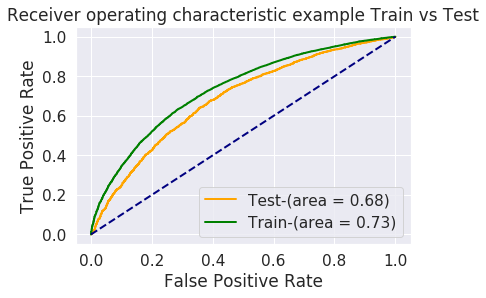

In [196]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(test_fpr, test_tpr,color='orange',
         lw=lw, label='Test-(area = %0.2f)' % test_aucscore)
plt.plot(train_fpr, train_tpr, color='green',
         lw=lw, label='Train-(area = %0.2f)' % train_aucscore)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Train vs Test')
plt.legend(loc="lower right")
plt.show()

#### Sixty eight percent of the data points are correctly classified as their respective classes (from the true values)

### confusion matrix

In [197]:
test_confusionmatrix=confusion_matrix(y_test, ytest_predict, labels=None)
train_confusionmatrix=confusion_matrix(y_train, ytrain_predict, labels=None)

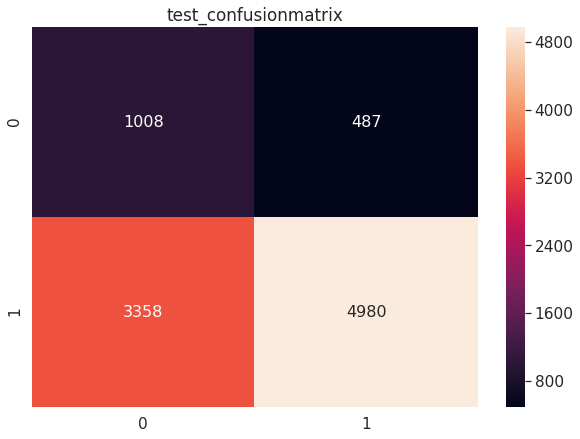

In [198]:
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
test_confusionmatrix=confusion_matrix(y_test, ytest_predict, labels=None)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = test_confusionmatrix
df_cm = pd.DataFrame(array, index = [0,1],
                  columns = [0,1])
plt.figure(figsize = (10,7))
plt.title("test_confusionmatrix")
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='d')

plt.show()

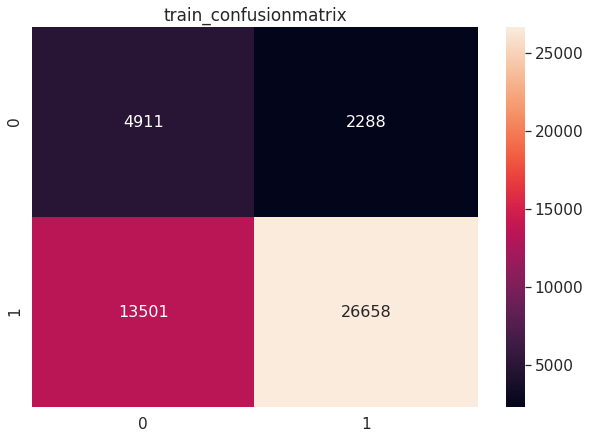

In [199]:
array = train_confusionmatrix
df_cm = pd.DataFrame(array, index = [0,1],
                  columns = [0,1])
plt.figure(figsize = (10,7))
plt.title("train_confusionmatrix")
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='d')

plt.show()

# AVG W2V

In [204]:
import pickle

# prepare a range of alpha values to test
alphas = [{'C':[0.001,0.01,0.1,1,10,100,1000]}]
# create and fit a ridge regression model, testing each alpha
model = LogisticRegression(class_weight='balanced')
k_f=10   
grid_avgw2v = GridSearchCV(estimator=model,cv=k_f, param_grid=alphas,scoring='roc_auc',n_jobs=-1)
grid_avgw2v.fit(x4_train, y_train)

pickle.dump(grid_avgw2v, open('grid_avgw2v.p', 'wb'))
best_est=grid_avgw2v.best_estimator_
print(best_est)

LogisticRegression(C=1000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


In [205]:
grid_avgw2v.cv_results_

{'mean_fit_time': array([  6.66427901,  12.95602751,  25.55975356,  64.16318464,
        125.98876364, 242.49752336, 459.95321317]),
 'std_fit_time': array([ 0.60012124,  0.84825709,  0.89569309,  2.02667391,  6.77049539,
        18.27531711, 39.87738851]),
 'mean_score_time': array([0.01913321, 0.02983465, 0.02409086, 0.01373613, 0.01134474,
        0.00817039, 0.01005309]),
 'std_score_time': array([0.01172833, 0.01156792, 0.0133722 , 0.00745885, 0.00106879,
        0.00144275, 0.00742115]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.57940357, 0.62779438, 0.66634642, 0.68389636, 0.69030925,
        0.69299088, 0.69339413]),
 'split1_test_score': array([0.56187542, 0.61287109, 0.65539785, 0.67232563, 0

In [128]:
c_values=[0.001,0.01,0.1,1,10,100,1000]
train_auc=[0.59465182, 0.65098823, 0.70095116, 0.7266777 , 0.73570064,
        0.73852944, 0.73889543]
test_auc=[0.58384956, 0.6305733 , 0.66823455, 0.68001938, 0.68200388,
        0.68385207, 0.68411296]

In [142]:
'''c_values=np.array([0.01,0.1,1,10,100])
from sklearn.metrics import roc_auc_score
cv_auc=[]
train_auc=[]
for k in c_values:
    
    clf = LogisticRegression(C=k,class_weight='balanced',n_jobs=-1)
    clf.fit(x4_train, y_train)
    ycv_predict=(clf.predict(x4_cv))
    ytrain_predict=(clf.predict(x4_train))
    ycv_predictproba=(clf.predict_proba(x4_cv))
    ytrain_predictproba=(clf.predict_proba(x4_train))
    cv_aucscore=roc_auc_score(y_cv, ycv_predictproba[:,1], average=None, sample_weight=None, max_fpr=None)
    train_aucscore=roc_auc_score(y_train, ytrain_predictproba[:,1], average=None, sample_weight=None, max_fpr=None)
    cv_auc.append(cv_aucscore)
    train_auc.append(train_aucscore)
print(train_auc)
'''

[0.6501082215418327, 0.6978189741340057, 0.7209173338728935, 0.7291058879957586, 0.7315350603451571]


In [129]:
xaxis=[]
for x in list(c_values):
    
    a=m.log(x,10)
    xaxis.append(a)
print(xaxis)    



[-2.9999999999999996, -1.9999999999999996, -0.9999999999999998, 0.0, 1.0, 2.0, 2.9999999999999996]


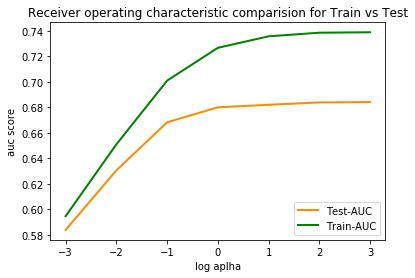

In [130]:

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(xaxis,test_auc, color='darkorange',
         lw=lw, label='Test-AUC')
plt.plot(xaxis, train_auc, color='green',
         lw=lw, label='Train-AUC')

#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('log aplha')
plt.ylabel('auc score')
plt.title('Receiver operating characteristic comparision for Train vs Test')
plt.legend(loc="lower right")
plt.show() 

### AUC Score avg w2v

In [138]:

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1000,class_weight='balanced')
clf.fit(x4_train, y_train)

ytest_predict=(clf.predict(x4_test))
ytrain_predict=(clf.predict(x4_train))

ytest_predictproba=(clf.predict_proba(x4_test))
ytrain_predictproba=(clf.predict_proba(x4_train))

from sklearn.metrics import roc_auc_score
test_aucscore=0
train_aucscore=0

test_aucscore=roc_auc_score(y_test, ytest_predictproba[:,1], average=None, sample_weight=None, max_fpr=None)
train_aucscore=roc_auc_score(y_train, ytrain_predictproba[:,1], average=None, sample_weight=None, max_fpr=None)

print(test_aucscore)
print(train_aucscore)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
import numpy as np
from sklearn import metrics


test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test,ytest_predictproba[:,1] )
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train,ytrain_predictproba[:,1] )

print(ytest_predictproba[:,1])
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py


0.6881283337518281
0.7358389172313564
[0.71556151 0.39842842 0.5083635  ... 0.51544991 0.93713985 0.31994919]


#### AUC CURVE

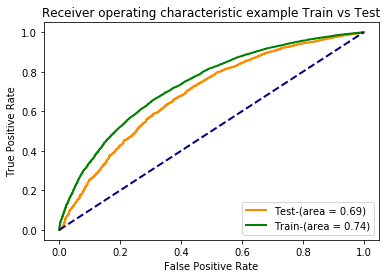

In [139]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test-(area = %0.2f)' % test_aucscore)
plt.plot(train_fpr, train_tpr, color='green',
         lw=lw, label='Train-(area = %0.2f)' % train_aucscore)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Train vs Test')
plt.legend(loc="lower right")
plt.show()

#### Sixty nine percent of the data points are correctly classified as their respective classes (from the true values)

####  Confusion Matrix 

In [140]:
from sklearn.metrics import confusion_matrix

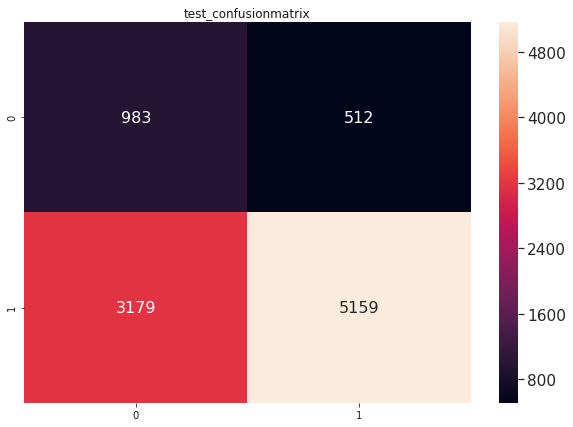

In [141]:
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
test_confusionmatrix=confusion_matrix(y_test, ytest_predict, labels=None)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = test_confusionmatrix
df_cm = pd.DataFrame(array, index = [0,1],
                  columns = [0,1])
plt.figure(figsize = (10,7))
plt.title("test_confusionmatrix")
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='d')

plt.show()

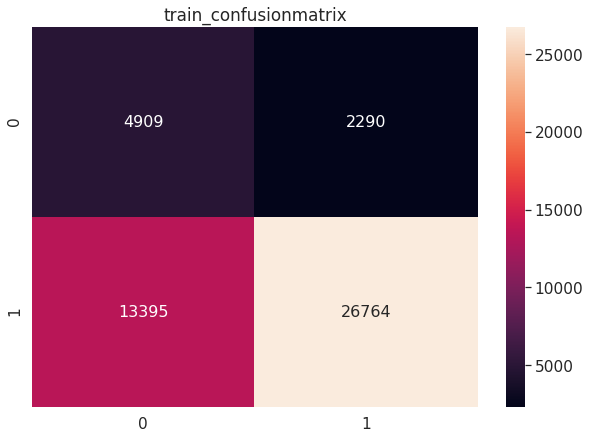

In [142]:
train_confusionmatrix=confusion_matrix(y_train, ytrain_predict, labels=None)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = train_confusionmatrix
df_cm = pd.DataFrame(array, index = [0,1],
                  columns = [0,1])
plt.figure(figsize = (10,7))
plt.title("train_confusionmatrix")
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='d')

plt.show()

## Feature_selection for SET1(bow)

In [143]:
clf.coef_

array([[ 4.04701827e+00,  9.29360010e-01,  3.65948507e+00,
         2.73665931e+00,  3.10130238e+00, -2.51831581e-01,
         1.28337958e+00, -6.07516734e-01,  9.29360010e-01,
         2.78861581e+00,  7.70516692e-01, -4.33440434e+00,
        -1.85724724e+00,  3.22587571e+00, -7.37985593e-01,
        -2.08241885e+00, -7.22744833e-01,  8.04422954e-03,
         7.38894173e-01, -9.83890444e-01,  6.16950083e-01,
         3.50425529e+00, -1.81889140e+00, -5.54862824e-01,
        -5.86869119e+00,  2.93753158e+00, -1.80840986e+00,
        -2.71208834e+00,  3.28524695e+00, -2.38927398e+00,
        -3.03194905e+00,  5.72220758e-01, -2.34480096e+00,
         2.72914371e+00,  8.56268013e-01,  1.39225660e+00,
        -1.35209226e+00,  3.87935950e+00, -1.11598919e+00,
         2.94982175e+00, -1.62365745e+00,  3.19003160e+00,
        -5.81583149e-01,  7.39596128e-01,  4.54060406e+00,
         4.98809275e-01,  1.38249949e+00, -1.52631701e+00,
         3.57167392e+00,  8.39135489e+00,  5.52848170e+0

In [144]:
log_prob = np.squeeze(clf.coef_)

In [145]:
feat_coeff=np.argsort(-log_prob)[:30]

In [146]:
best_feat = np.array(list_features)[feat_coeff]

In [147]:
print(list(best_feat))

['can build', 'mathematicsperforming', 'economicsmathematics', 'serviceparent', 'and glue', 'governmentfinancial', 'active kids', 'serviceearly', '4th', 'prephealth', 'economicsvisual', 'economicsspecial', 'economicsmusic', 'and critical', 'scienceseconomics', 'sciencefinancial', 'and minds', 'alexa', 'access to', 'serviceperforming', 'access', 'musicother', 'economicsenvironmental', 'fitnessperforming', 'and learn', 'sciencegym', 'and growing', 'and collaboration', 'sciencesteam', 'musicsocial']


### Set 5without text features

In [149]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x5_train = hstack((traincategories_one_hot, trainsub_categories_one_hot,trainproject_grade_category_upd_one_hot,X_train_price_standardized.reshape(-1,1),X_train_teacher_number_of_previously_posted_projects_standardized.reshape(-1,1)))
x5_test=hstack((testcategories_one_hot, testsub_categories_one_hot,testproject_grade_category_upd_one_hot,X_test_price_standardized.reshape(-1,1),X_test_teacher_number_of_previously_posted_projects_standardized.reshape(-1,1)))
#x5_cv=hstack((cvcategories_one_hot, cvsub_categories_one_hot,cvproject_grade_category_upd_one_hot,X_cv_price_standardized.reshape(-1,1),X_cv_teacher_number_of_previously_posted_projects_standardized.reshape(-1,1)))


In [151]:
import pickle
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = [{'C':[0.001,0.01,0.1,1,10,100,1000]}]
# create and fit a ridge regression model, testing each alpha
model = LogisticRegression(class_weight='balanced')
k_f=10   
grid_notext = GridSearchCV(estimator=model,cv=k_f, param_grid=alphas,scoring='roc_auc',n_jobs=-1)
grid_notext.fit(x5_train, y_train)

pickle.dump(grid_notext, open('grid_notext.p', 'wb'))
best_est=grid_notext.best_estimator_
print(best_est)

LogisticRegression(C=1000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


In [153]:
grid_notext.cv_results_

{'mean_fit_time': array([0.15402055, 0.20055237, 0.43283763, 1.03053372, 2.77761717,
        4.64853551, 5.46288531]),
 'std_fit_time': array([0.01003736, 0.02420944, 0.05235575, 0.10828886, 0.65879254,
        0.60246336, 0.55671559]),
 'mean_score_time': array([0.00402935, 0.00418265, 0.00595269, 0.00725946, 0.00518382,
        0.00430629, 0.00286109]),
 'std_score_time': array([0.00020946, 0.00046648, 0.0017186 , 0.00201865, 0.00154655,
        0.00107352, 0.00156912]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.55399842, 0.55973415, 0.56084395, 0.56640331, 0.59173981,
        0.60303007, 0.60435359]),
 'split1_test_score': array([0.56004074, 0.56146214, 0.56204661, 0.56221468, 0.57990088,
        0.

In [154]:
c_values=[0.001,0.01,0.1,1,10,100,1000]
test_auc=[0.55308798, 0.55810391, 0.55850174, 0.56281199, 0.58492345,
        0.59644605, 0.59808961]
train_auc=[0.55879767, 0.57133358, 0.58329184, 0.5954874 , 0.61726272,
        0.6269228 , 0.62815856]

[-2.9999999999999996, -1.9999999999999996, -0.9999999999999998, 0.0, 1.0, 2.0, 2.9999999999999996]
[0.55308798, 0.55810391, 0.55850174, 0.56281199, 0.58492345, 0.59644605, 0.59808961]
[0.55879767, 0.57133358, 0.58329184, 0.5954874, 0.61726272, 0.6269228, 0.62815856]


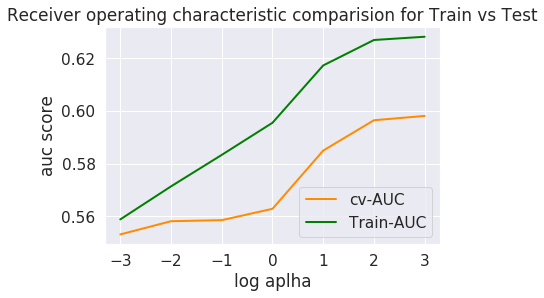

In [156]:
import math as m
xaxis=[]
for x in list(c_values):
    
    a=m.log(x,10)
    xaxis.append(a)
print(xaxis)    

print(test_auc)
print(train_auc)




# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(xaxis,test_auc, color='darkorange',
         lw=lw, label='cv-AUC')
plt.plot(xaxis, train_auc, color='green',
         lw=lw, label='Train-AUC')

#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('log aplha')
plt.ylabel('auc score')
plt.title('Receiver operating characteristic comparision for Train vs Test')
plt.legend(loc="lower right")
plt.show() 

In [157]:



clf = LogisticRegression(C=1000,class_weight='balanced')
clf.fit(x5_train, y_train)

ytest_predict=(clf.predict(x5_test))
ytrain_predict=(clf.predict(x5_train))

ytest_predictproba=(clf.predict_proba(x5_test))
ytrain_predictproba=(clf.predict_proba(x5_train))

from sklearn.metrics import roc_auc_score
test_aucscore=0
train_aucscore=0

test_aucscore=roc_auc_score(y_test, ytest_predictproba[:,1], average=None, sample_weight=None, max_fpr=None)
train_aucscore=roc_auc_score(y_train, ytrain_predictproba[:,1], average=None, sample_weight=None, max_fpr=None)

print(test_aucscore)
print(train_aucscore)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
import numpy as np
from sklearn import metrics


test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test,ytest_predictproba[:,1] )
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train,ytrain_predictproba[:,1] )

print(ytest_predictproba[:,1])
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py


0.6059777093389574
0.6271447126301926
[0.53750688 0.64629106 0.39616075 ... 0.63047807 0.83232148 0.36428158]


### AUC curve

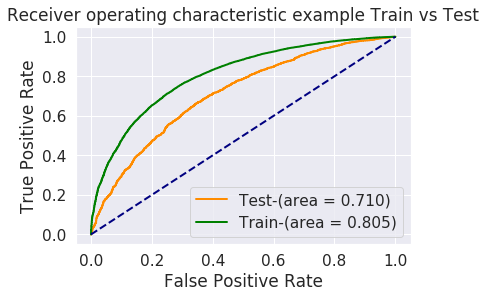

In [164]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test-(area = %0.3f)' % test_aucscore)
plt.plot(train_fpr, train_tpr, color='green',
         lw=lw, label='Train-(area = %0.3f)' % train_aucscore)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Train vs Test')
plt.legend(loc="lower right")
plt.show()

#### Both the test and train auc scores are approximately equal to each other

### Confusion Matrix

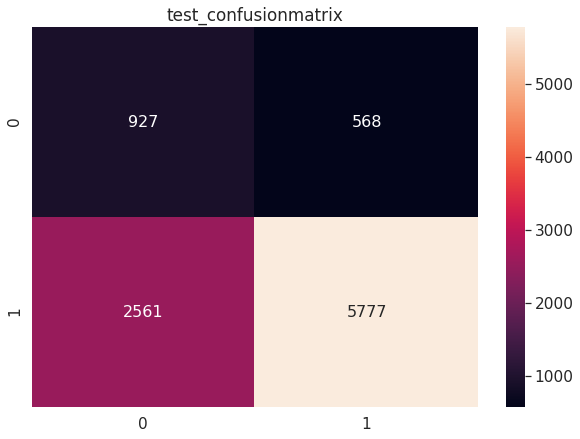

In [165]:
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
test_confusionmatrix=confusion_matrix(y_test, ytest_predict, labels=None)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = test_confusionmatrix
df_cm = pd.DataFrame(array, index = [0,1],
                  columns = [0,1])

plt.figure(figsize = (10,7))
plt.title("test_confusionmatrix")
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='d')

plt.show()

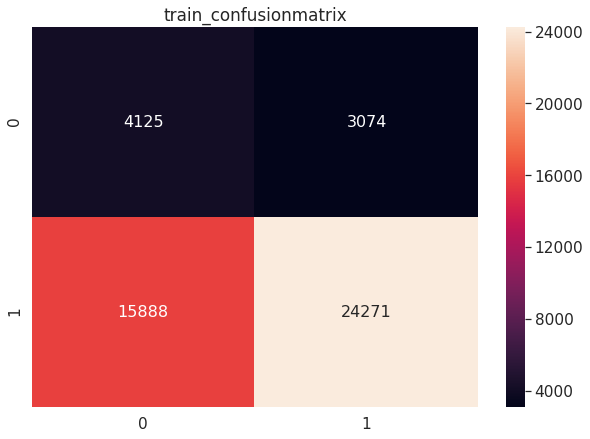

In [161]:
train_confusionmatrix=confusion_matrix(y_train, ytrain_predict, labels=None)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = train_confusionmatrix
df_cm = pd.DataFrame(array, index = [0,1],
                  columns = [0,1])

plt.figure(figsize = (10,7))
plt.title("train_confusionmatrix")
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='d')

plt.show()

## Pretty Table

In [166]:

x = PrettyTable()
x.field_names = ["BEST_HYPERPARAMETER", "featurisation_technic", "train ROC_AUC","test ROC_AUC"]
x.add_row([0.01,'bow',0.79,0.71])
x.add_row([0.1,'tfidf bow',0.80,0.71])
x.add_row([1000,'tfidf w2v',0.73,0.68])
x.add_row([1000,'avg w2v',0.74,0.69])
x.add_row([1000, 'no text features',0.627,0.606])
print(x)


+---------------------+-----------------------+---------------+--------------+
| BEST_HYPERPARAMETER | featurisation_technic | train ROC_AUC | test ROC_AUC |
+---------------------+-----------------------+---------------+--------------+
|         0.01        |          bow          |      0.79     |     0.71     |
|         0.1         |       tfidf bow       |      0.8      |     0.71     |
|         1000        |       tfidf w2v       |      0.73     |     0.68     |
|         1000        |        avg w2v        |      0.74     |     0.69     |
|         1000        |    no text features   |     0.627     |    0.606     |
+---------------------+-----------------------+---------------+--------------+


## Observations

#### From the above Logistic model ,it is observed that :
#### There is a much difference betwen the scores WITH OUT text when compared with rest of the observations.
#### There is a significant variation in the scores of test and train but it is not observed in the set containg no text features.
#### Words/Features that are given top priority-Mathematics,Economics,etc.. 
#### Results when the text features are removed are not as realistic as the rest.This can be observed from the confusion matrices where false positives and false negatives are considerably more in number